# Yelp Business Performance and Customer Satisfaction Analysis

#### Team: B08  

**Team Members:** Burak Ataseven, Sai Leela Rahul Pujari, Abbinaya Kalidhas, Nathan Leung, Irene Tang, Sarah Dsouza  




---



#### Tableau links:

Story 1: http://public.tableau.com/app/profile/sai.leela.rahul.pujari7964/viz/YelpBusinessPerformanceandCustomerSatisfactionAnalysis/Story1?publish=yes

Story 2: https://public.tableau.com/app/profile/sai.leela.rahul.pujari7964/viz/YelpBusinessPerformanceandCustomerSatisfactionAnalysis/Story2?publish=yes



---



#### Entity Relationship Diagram

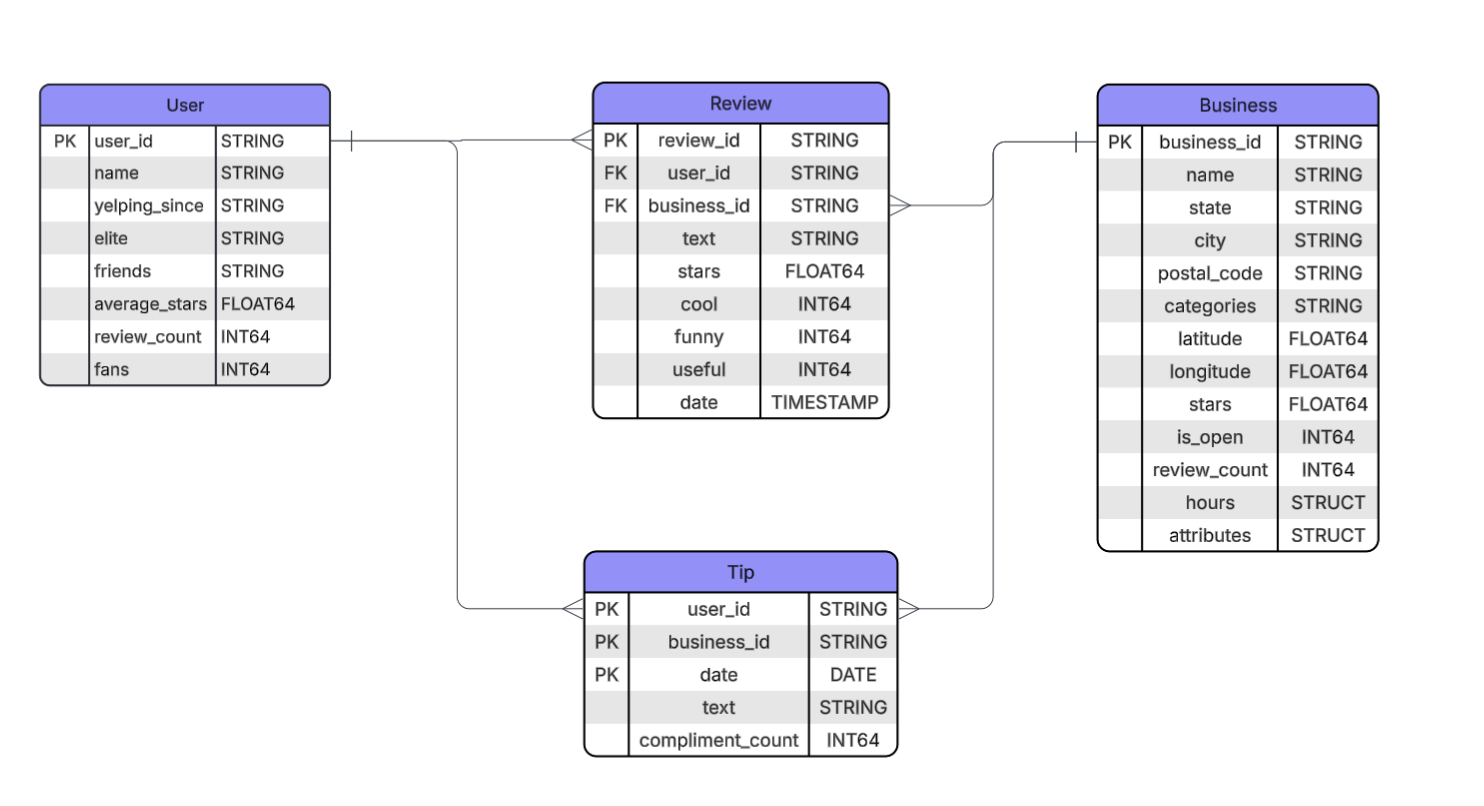



---



#### Executive Summary


This project examines Yelp’s business and review ecosystem to help businesses understand where customer engagement is concentrated, how different categories perform, and which factors drive satisfaction or risk. Using SQL analysis and Tableau dashboards, we found that Yelp activity is unevenly distributed across states, with Pennsylvania showing the highest business density, and that high-volume categories such as Food, Beauty & Spas, and Shopping attract substantial engagement but exhibit inconsistent rating stability. Review behavior has shifted over time, with long-form reviews declining since 2020 and clear seasonal patterns influencing monthly review volume. Elite and Power users generate disproportionate engagement through reactions, highlighting their importance in shaping public perception. Several categories—including Matchmakers, 3D Printing, and Jails & Prisons—show extremely high negative review rates, indicating structural challenges. Recommendations include improving service consistency in volatile categories, leveraging elite-user engagement, monitoring seasonal trends for operational planning, and adopting strong expectation-management strategies in high-risk industries. Overall, the analysis provides actionable insights that help businesses improve customer satisfaction, reduce reputational risk, and adapt to evolving review behaviors on Yelp.



---



### 1.1 Business Problem Definition and Significance

This project seeks to examine Yelp’s business and customer review ecosystem through an integrated data analysis framework that includes SQL querying, data transformation, and interactive Tableau dashboards. The objective is to understand how businesses perform across different states and categories, how reviewers behave over time, and how platform engagement varies across user segments. The analysis focuses on five key questions:

1.   Where is Yelp activity most concentrated geographically, and what does this reveal about competitive market environments?

2.   Which business categories attract the highest levels of engagement, and how consistent are their ratings?

3.   How has review behavior changed over time, particularly with regard to long-form, medium-form, and short-form reviews?

4.   How do elite, power, regular, and casual users differ in their engagement patterns, and what influence do they have on overall sentiment?

5.   Which business categories face the highest negative review rates, and what does this indicate about systemic customer dissatisfaction?

By answering these questions, the analysis provides a holistic view of Yelp’s business landscape, identifies sources of customer dissatisfaction, and highlights strategic insights that businesses can use to improve service quality and enhance their presence on Yelp.

### 1.2 Data Source Description and Schema Overview

#### Data Source:

Yelp Open Dataset

#### License

[Dataset User Agreement](https://drive.google.com/file/d/18fmfPn73PNg-bSsuCl4Yiz5bbqWUpTV7/view?usp=sharing)

#### Access
[Yelp Business Data](https://www.yelp.com/dataset)

Dataset Size: ~7M reviews, 150K businesses, 900K tips across multiple cities

Time Range: Reviews span from 2005 to 2025, with the majority concentrated in recent years

#### 1. Business Table (business_cleaned)

Contains comprehensive business profile information and serves as the central entity in our analysis.


Key Fields:

*   business_id (STRING): Unique identifier for each business - primary key for joins

*   name (STRING): Business name as it appears on Yelp

*   location data: address, city, state, postal_code, latitude, longitude
categories (STRING): Comma-separated list of business categories (e.g., "Restaurants, Italian, Pizza")

*   stars (FLOAT64): Average star rating aggregated from all reviews (1.0 to 5.0)

*   review_count (INT64): Total number of reviews the business has received

*   is_open (INT64): Current operational status (1 = open, 0 = closed)

*   attributes (STRUCT): Nested structure containing 38+ business attributes including:
*   *   RestaurantsPriceRange2 (1-4 cost indicator)
*   *   WiFi availability (free, paid, none)
*   *   Parking options
*   *   Ambience descriptors
*   *   Service features (delivery, takeout, reservations)


*   hours (STRUCT): Operating hours for each day of the week (Sunday through Saturday)

Profile Completeness Score:

We derived a composite "profile score" (0-3) based on:

*   Has operating hours listed (+1)
*   Has attributes data (+1)
*   Has specific service attributes like takeout (+1)

Data Quality Notes:

*   150,346 total businesses in cleaned dataset

*   73 businesses have missing postal codes (0.05%)

*   All other core fields are complete

*   Attributes and hours are optional fields - presence indicates profile engagement



---



#### 2. Review Table (review_cleaned)

Contains detailed user reviews with ratings, text content, and engagement metrics. This is the largest and most analytically rich table.

Key Fields:

*   review_id (STRING): Unique identifier for each review

*   user_id (STRING): Identifier for the reviewing user

*   business_id (STRING): Links to business table

*   stars (FLOAT64): User's rating for this specific visit (1.0 to 5.0)

*   review_date (DATE): When the review was written (converted from TIMESTAMP for consistency)

*   text (STRING): Full review text content (trimmed, non-empty)

*   useful (INT64): Number of users who marked review as "useful"

*   funny (INT64): Number of users who marked review as "funny"

*   cool (INT64): Number of users who marked review as "cool"

Engagement Metrics:

The useful/funny/cool votes serve as community validation signals, indicating which reviews provide the most value to other users.

Data Quality Notes:

*   6,990,280 total reviews after cleaning

*   All reviews have valid star ratings (1-5 range)

*   All review text is non-empty (empty reviews removed)

*   Date format standardized to DATE type for temporal analysis

*   4 records with negative funny values removed

*   2 records with negative cool values removed

*   1 record with negative useful values removed

Temporal Distribution:

*   Reviews span 20 years (2005-2025)

*   Strong concentration in 2015-2025 period

*   Enables time-series analysis of business reputation trends



---



#### 3. Tip Table (tip_cleaned)

Contains short, actionable suggestions that users leave for businesses - distinct from full reviews.

Key Fields:

*   user_id (STRING): Identifier for the user who left the tip

*   business_id (STRING): Links to business table

*   date (DATE): When the tip was written (YYYY-MM-DD format)

*   text (STRING): Brief tip content (converted to title case for consistency)

*   compliment_count (INT64): Number of compliments the tip received

Data Quality Notes:

*   908,915 total tips after cleaning

*   All tips have valid text content (no empty strings)

*   Date format standardized to DATE type

*   Text converted to consistent title case formatting

*   No missing values in core fields



---



## Section 2: Data Quality Assurance and Preparation (Cleaning Phase)

This phase ensures the reliability and consistency of the dataset before any substantive analysis is
performed. Our focus is on the critical review and business tables.

### 2.1 Review Table: Initial Schema and Data Type Validation


The structure of the primary tables is systematically inspected using the Information Schema to confirm column names, data types, and nullability. This ensures proper compatibility for subsequent joins and aggregations.



In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT column_name, data_type FROM `ba775-fall25-b08.examples.INFORMATION_SCHEMA.COLUMNS` WHERE table_name = 'review';
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

Computation deferred. Computation will process 0 Bytes

Sample record shows structure is consistent with expected schema. Text content is present and readable, engagement metrics are numeric, and dates are properly formatted as TIMESTAMP.

Initial Data Preview:

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT * FROM `ba775-fall25-b08.examples.review` LIMIT 5
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

Computation deferred. Computation will process 5.2 kB

### 2.2 Review Table: Missing Value and Invalid Data Detection

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  COUNT(*) AS total_rows,
  COUNTIF(review_id IS NULL) AS null_review_id,
  COUNTIF(user_id IS NULL) AS null_user_id,
  COUNTIF(business_id IS NULL) AS null_business_id,
  COUNTIF(stars IS NULL) AS null_stars,
  COUNTIF(date IS NULL) AS null_date,
  COUNTIF(text IS NULL OR LENGTH(TRIM(text)) = 0) AS empty_text,
  COUNTIF(stars < 1 OR stars > 5) AS invalid_stars,
  COUNTIF(useful < 0) AS invalid_useful,
  COUNTIF(funny < 0) AS invalid_funny,
  COUNTIF(cool < 0) AS invalid_cool
FROM `ba775-fall25-b08.examples.review`;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

Computation deferred. Computation will process 0 Bytes

### 2.3 Review Table: Data Cleaning and Standardization

Cleaning Strategy:

1.   Remove records with invalid engagement metrics (negative values)

2.   Validate star ratings are within [1,5] range

3.   Convert date from TIMESTAMP to DATE for consistency

4.   Trim whitespace from review text

5.   Filter out empty review text

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
CREATE OR REPLACE TABLE `ba775-fall25-b08.examples.review_cleaned` AS
SELECT
  review_id,
  user_id,
  business_id,
  CASE WHEN stars BETWEEN 1 AND 5 THEN stars ELSE NULL END AS stars,
  DATE(date) AS review_date,
  TRIM(text) AS text,
  CASE WHEN useful >= 0 THEN useful ELSE NULL END AS useful,
  CASE WHEN funny >= 0 THEN funny ELSE NULL END AS funny,
  CASE WHEN cool >= 0 THEN cool ELSE NULL END AS cool
FROM `ba775-fall25-b08.examples.review`
WHERE
  review_id IS NOT NULL AND
  user_id IS NOT NULL AND
  business_id IS NOT NULL AND
  stars IS NOT NULL AND
  LENGTH(TRIM(text)) > 0 AND
  date IS NOT NULL;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  COUNT(*) AS total_rows,
  COUNTIF(stars IS NULL) AS invalid_stars,
  COUNTIF(review_id IS NULL) AS null_review_id,
  COUNTIF(user_id IS NULL) AS null_user_id,
  COUNTIF(business_id IS NULL) AS null_business_id,
  COUNTIF(LENGTH(TRIM(text)) = 0) AS empty_text,
  COUNTIF(useful < 0) AS invalid_useful,
  COUNTIF(funny < 0) AS invalid_funny,
  COUNTIF(cool < 0) AS invalid_cool
FROM `ba775-fall25-b08.examples.review_cleaned`;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

Cleaning Impact:

*   Before: 6,990,280 records with 7 invalid entries

*   After: 6,990,280 records with 0 invalid entries

*   Data Loss: Effectively 0% (7 records = 0.0001% of dataset)

### 2.4 Business Table: Schema Validation and Initial Inspection

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
-- schema_check
SELECT column_name, data_type
FROM `ba775-fall25-b08.examples`.INFORMATION_SCHEMA.COLUMNS
WHERE table_name = 'review_cleaned';
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=9, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

Check the data types and the column names to understand the dataset better

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT column_name, data_type FROM `ba775-fall25-b08.examples`.INFORMATION_SCHEMA.COLUMNS
WHERE table_name = 'Yelp Clean';
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=14, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

Preview the dataset

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT *
FROM `ba775-fall25-b08.examples.Yelp Clean`
LIMIT 5;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=5, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

### 2.5 Business Table: Missing Value Detection

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  COUNT(*) AS total_rows,
  COUNTIF(business_id IS NULL) AS null_business_id,
  COUNTIF(name IS NULL OR TRIM(name) = '') AS null_name,
  COUNTIF(categories IS NULL OR TRIM(categories) = '') AS null_categories,
  COUNTIF(state IS NULL OR TRIM(state) = '') AS null_state,
  COUNTIF(postal_code IS NULL OR TRIM(postal_code) = '') AS null_postal_code,
  COUNTIF(review_count IS NULL) AS null_review_count,
  COUNTIF(stars IS NULL) AS null_stars,
  COUNTIF(latitude IS NULL OR longitude IS NULL) AS null_coordinates,
  COUNTIF(stars < 1 OR stars > 5) AS invalid_stars,
  COUNTIF(review_count < 0) AS invalid_review_count,
  COUNTIF(is_open NOT IN (0, 1)) AS invalid_is_open,
  COUNTIF(attributes IS NULL) AS null_attributes,
  COUNTIF(hours IS NULL) AS null_hours
FROM `ba775-fall25-b08.examples.Yelp Clean`;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  COUNT(*) AS total_rows,
  COUNTIF(postal_code IS NULL) AS null_zip,
  COUNTIF(TRIM(postal_code) = '') AS blank_zip
FROM `ba775-fall25-b08.examples.Yelp Clean`;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

Key Finding: Only postal_code has missing values (73 records = 0.05% of dataset). All other fields are complete.

### 2.6 Business Table: Postal Code Cleaning

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
CREATE OR REPLACE TABLE `ba775-fall25-b08.examples.business_cleaned` AS
SELECT
  t.* REPLACE (NULLIF(TRIM(postal_code), '') AS postal_code)
FROM `ba775-fall25-b08.examples.Yelp Clean` AS t;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

Verification:


In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  COUNT(*) AS total_rows_after,
  COUNTIF(postal_code IS NULL) AS null_zip_after,
  COUNTIF(TRIM(postal_code) = '') AS blank_zip_after
FROM `ba775-fall25-b08.examples.business_cleaned`;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

Before/After Comparison:

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH before AS (
  SELECT
    COUNT(*) AS total_rows,
    COUNTIF(postal_code IS NULL) AS null_zip,
    COUNTIF(TRIM(postal_code) = '') AS blank_zip
  FROM `ba775-fall25-b08.examples.Yelp Clean`
),
after AS (
  SELECT
    COUNT(*) AS total_rows,
    COUNTIF(postal_code IS NULL) AS null_zip,
    COUNTIF(TRIM(postal_code) = '') AS blank_zip
  FROM `ba775-fall25-b08.examples.business_cleaned`
)
SELECT
  'postal_code' AS field,
  b.total_rows AS total_before,
  a.total_rows AS total_after,
  b.null_zip  AS null_before,
  a.null_zip  AS null_after,
  b.blank_zip AS blank_before,
  a.blank_zip AS blank_after
FROM before b
CROSS JOIN after a;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

Result: Successfully converted 73 blank postal codes to NULL values. No data loss, improved data consistency.

### 2.7 Business Table: Final Validation

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  COUNT(*) AS total_rows,
  COUNTIF(business_id IS NULL) AS null_business_id,
  COUNTIF(name IS NULL OR TRIM(name) = '') AS null_name,
  COUNTIF(categories IS NULL OR TRIM(categories) = '') AS null_categories,
  COUNTIF(state IS NULL OR TRIM(state) = '') AS null_state,
  COUNTIF(postal_code IS NULL OR TRIM(postal_code) = '') AS null_postal_code,
  COUNTIF(review_count IS NULL) AS null_review_count,
  COUNTIF(stars IS NULL) AS null_stars,
  COUNTIF(latitude IS NULL OR longitude IS NULL) AS null_coordinates,
  COUNTIF(stars < 1 OR stars > 5) AS invalid_stars,
  COUNTIF(review_count < 0) AS invalid_review_count,
  COUNTIF(is_open NOT IN (0, 1)) AS invalid_is_open,
  COUNTIF(attributes IS NULL) AS null_attributes,
  COUNTIF(hours IS NULL) AS null_hours
FROM `ba775-fall25-b08.examples.business_cleaned`;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

Takeaway:

The business table was remarkably clean, requiring minimal intervention. Key fields including business_id, name, categories, state, postal_code, stars, review_count, latitude, longitude, and is_open were validated for missing or invalid values. All fields were complete except postal_code, which had 73 missing values (0.05% of dataset). After cleaning, rating values are confirmed within [1,5], coordinates are within valid bounds, category fields contain no blank strings, and postal_code contains no blank strings (remaining NULLs are acceptable as they represent genuinely missing data). These choices avoid selection bias, preserve sample size (100% data retention), and support downstream analyses on ratings, review volume, and geographical patterns.

### 2.8 Tip Table: Schema Validation

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
# schema_check
SELECT column_name, data_type
FROM `ba775-fall25-b08.examples`.INFORMATION_SCHEMA.COLUMNS
WHERE table_name = 'business_cleaned';
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=14, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT column_name, data_type
FROM  `ba775-fall25-b08.examples.INFORMATION_SCHEMA.COLUMNS`
WHERE table_name = 'tip';
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=5, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT *
FROM  `ba775-fall25-b08.examples.tip`
LIMIT 5;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=5, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

### 2.9 Tip Table: Missing Value Detection

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  COUNT(*) AS total_rows,
  COUNTIF(text IS NULL OR TRIM(text) = '') AS null_text,
  COUNTIF(compliment_count IS NULL) AS null_complimentcount,
  COUNTIF(business_id IS NULL) AS null_business_id,
  COUNTIF(user_id IS NULL) AS null_user_id
FROM  `ba775-fall25-b08.examples.tip`;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

Key Finding: Perfect data quality - no missing values in any fields.

### 2.10 Tip Table: Data Standardization

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
CREATE OR REPLACE TABLE ba775-fall25-b08.examples.tip_cleaned AS
SELECT
DATE(date) AS date,
CONCAT(UPPER(SUBSTRING(text, 1, 1)),LOWER(SUBSTRING(text, 2, LENGTH(text)))) AS text,
compliment_count,
business_id,
user_id
FROM `ba775-fall25-b08.examples.tip`
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

Takeaway:

The tip table was pristine - requiring no data quality fixes, only format standardization. Key fields including date, text, compliment_count, business_id, and user_id were validated for missing or invalid values. All fields were 100% complete with no null values detected. The text field was converted to consistent title case formatting, and the date field was converted from TIMESTAMP to DATE format (YYYY-MM-DD) for consistency with other tables. With 908,915 total tips and zero data quality issues, the dataset is ready for analysis with 100% data retention.



---



## Section 3: Exploratory Data Analysis (EDA)

This section systematically examines the Yelp dataset through 16 targeted research questions. Each question is designed to uncover actionable insights about business performance drivers, customer engagement patterns, and platform dynamics.

**Overview of Research Questions**

**A. Business Performance Fundamentals (Q1-Q3)**

Which categories attract the most engagement?
Which businesses maintain consistent quality?
Where are the most engaged reviewers located?

**B. Engagement Dynamics (Q4-Q7)**

How does sentiment affect engagement?
Which categories struggle most?
Where is customer satisfaction most volatile?
How do established vs. trending categories differ?

**C. Temporal and User Patterns (Q8-Q10)**

Do ratings improve over time?
Are there day-of-week sentiment patterns?
Do power users have more influence?

**D. Content and Sentiment Analysis (Q11-Q13)**

What keywords drive tips engagement?
Do sentiment keywords affect compliments?
Do long-form reviewers stay longer?

**E. Business Strategy Insights (Q14-Q16)**

Does engagement speed correlate with future ratings?
Does profile completion drive customer lift?
Do complete profiles perform better?



#### Q1:  Which business categories receive the most reviews and the highest average ratings?

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  b.categories,
  COUNT(r.review_id) AS total_reviews,
  ROUND(AVG(r.stars), 2) AS avg_review_rating,
FROM `ba775-fall25-b08.examples.review_cleaned` AS r
JOIN `ba775-fall25-b08.examples.business_cleaned` AS b
  USING (business_id)
WHERE b.categories IS NOT NULL
GROUP BY b.categories
HAVING COUNT(r.review_id) > 100
ORDER BY avg_review_rating DESC, total_reviews DESC
LIMIT 15;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=15, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

Takeaway: Categories involving personalized service, experiences, and artistry dominate top reviews. These businesses likely rely on high customer emotional engagement, which encourages stronger loyalty and satisfaction.

#### Q2: Which businesses consistently maintain high customer ratings with minimal variation? (high avg, low variance)

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  b.name, b.city, b.state,
  COUNT(r.review_id) AS reviews,
  ROUND(AVG(r.stars), 3) AS avg_stars,
  ROUND(STDDEV_POP(r.stars), 3) AS stddev_stars
FROM `ba775-fall25-b08.examples.review_cleaned` r
JOIN `ba775-fall25-b08.examples.business_cleaned` b
  ON r.business_id = b.business_id
GROUP BY b.name, b.city, b.state, b.business_id
HAVING reviews >= 100
ORDER BY avg_stars DESC, stddev_stars ASC
LIMIT 25;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=25, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

Takeaway:
Businesses in Santa Barbara appear repeatedly - indicating a cluster of quality-driven local enterprises. Low variation (stddev < 0.2) means their customer experience is steady and dependable, not just occasionally excellent. These businesses have mastered operational consistency.

#### Q3: Which cities have the most “enthusiastic” reviewers (avg useful/funny/cool per review)?

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  b.city,
  COUNT(r.review_id) AS total_reviews,
  ROUND(AVG(r.useful), 2) AS avg_useful,
  ROUND(AVG(r.funny), 2) AS avg_funny,
  ROUND(AVG(r.cool), 2) AS avg_cool,
  ROUND(AVG(r.stars), 2) AS avg_stars
FROM `ba775-fall25-b08.examples.review_cleaned` AS r
JOIN `ba775-fall25-b08.examples.business_cleaned` AS b
  ON r.business_id = b.business_id
GROUP BY b.city
HAVING total_reviews > 200
ORDER BY avg_useful DESC
LIMIT 15;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=15, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

Insight: Cities like Fort Washington have 3842 expressive reviewers, though not necessarily more positive ones. Interestingly, higher engagement (useful votes) doesn’t always mean higher ratings — possibly reflecting more discerning local customers.

#### Q4: Are higher-rated businesses getting more engagement (useful/funny/cool votes)?

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  r.stars,
  ROUND(AVG(r.useful), 2) AS avg_useful,
  ROUND(AVG(r.funny), 2) AS avg_funny,
  ROUND(AVG(r.cool), 2) AS avg_cool,
  COUNT(*) AS review_count
FROM `ba775-fall25-b08.examples.review_cleaned` AS r
GROUP BY r.stars
ORDER BY r.stars DESC;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=5, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

Insight: There’s an inverse relationship between star rating and engagement — lower ratings get more useful votes, suggesting readers value critical insights. 5-star reviews are emotionally positive but less detailed or analytic.

#### Q5: Which business categories receive the highest proportion of bad reviews (1 or 2 stars)?

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  category,
  COUNTIF(r.stars <= 2) / COUNT(r.review_id) AS pct_bad_reviews,
  COUNT(r.review_id) AS total_reviews
FROM `ba775-fall25-b08.examples.business_cleaned` b
JOIN `ba775-fall25-b08.examples.review_cleaned` r
  ON b.business_id = r.business_id
JOIN UNNEST(SPLIT(b.categories, ',')) AS category
GROUP BY category
HAVING total_reviews >= 100
ORDER BY pct_bad_reviews DESC
LIMIT 15
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=15, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

Insights:
Service-heavy sectors—Billing Services (87.2%), Internet/Television providers (85.6%) have the highest share of negative reviews, reflecting unresolved issues and lack of support.​



#### Q6: Which business categories have the widest spread in customer satisfaction?

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  category,
  STDDEV(r.stars) AS rating_stddev,
  COUNT(r.review_id) AS num_reviews
FROM `ba775-fall25-b08.examples.business_cleaned` b
JOIN `ba775-fall25-b08.examples.review_cleaned` r ON b.business_id = r.business_id
JOIN UNNEST(SPLIT(b.categories, ',')) AS category
GROUP BY category
HAVING num_reviews >= 100
ORDER BY rating_stddev DESC
LIMIT 10
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=10, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

Insights:
A high standard deviation in customer ratings for categories like Water Delivery and Mortgage Lenders reveals major volatility: customer experiences vary widely, pointing to inconsistent process execution or highly segmented customer needs. This unpredictability erodes trust and loyalty because customers cannot reliably expect a certain level of service.

#### Q7: How do business categories of trending businesses (rapidly growing review counts) differ from those of top-reviewed businesses (highest cumulative review counts)?

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
--TOP REVIEWED BUSINESS
SELECT
  category,
  COUNT(DISTINCT b.business_id) AS num_businesses,
  SUM(b.review_count) AS total_reviews
FROM `ba775-fall25-b08.examples.business_cleaned` b
JOIN UNNEST(SPLIT(b.categories, ',')) AS category
GROUP BY category
ORDER BY total_reviews DESC
LIMIT 10
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=10, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
--TRENDING BUSINESS
SELECT
  category,
  COUNT(DISTINCT business_id) AS num_businesses,
  SUM(review_growth) AS total_recent_reviews
FROM (
  SELECT
    b.business_id,
    SPLIT(b.categories, ',') AS categories,
    COUNTIF(EXTRACT(YEAR FROM r.review_date) = 2025) AS review_growth
  FROM `ba775-fall25-b08.examples.business_cleaned` AS b
  JOIN `ba775-fall25-b08.examples.review_cleaned` AS r
    ON b.business_id = r.business_id
  GROUP BY b.business_id, b.categories
) AS growth_split
JOIN UNNEST(growth_split.categories) AS category
GROUP BY category
ORDER BY total_recent_reviews DESC
LIMIT 10;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=10, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

Insights: Top-reviewed and trending business categories do not currently overlap; established sectors continue to amass reviews, while consumer and Yelp data show rising interest in value shopping and home-oriented services—trends that may appear more strongly in reviews in the coming months.

#### Q8: Do businesses that respond to reviews see improved ratings over time?

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
-- Analyze rating trends over time for each business
WITH business_rating_trends AS (
  SELECT
    business_id,
    DATE_TRUNC(review_date, MONTH) as review_month,
    AVG(stars) as avg_rating,
    COUNT(*) as review_count
  FROM `ba775-fall25-b08.examples.review_cleaned`
  GROUP BY business_id, DATE_TRUNC(review_date, MONTH)
  HAVING COUNT(*) >= 3  -- Minimum reviews per month for stability
),
numbered_periods AS (
  SELECT
    business_id,
    review_month,
    avg_rating,
    review_count,
    ROW_NUMBER() OVER (PARTITION BY business_id ORDER BY review_month) as period_rank
  FROM business_rating_trends
)
SELECT
  business_id,
  CORR(period_rank, avg_rating) as rating_trend_correlation,
  COUNT(*) as num_periods,
  MIN(avg_rating) as min_period_rating,
  MAX(avg_rating) as max_period_rating,
  MAX(avg_rating) - MIN(avg_rating) as rating_improvement
FROM numbered_periods
GROUP BY business_id
HAVING COUNT(*) >= 6  -- At least 6 months of data
ORDER BY rating_improvement DESC
LIMIT 150;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=150, table_html='<table border="1" class="dataframe table table-striped ta…

Computation deferred. Computation will process 12.0 kB

Insights: Businesses show mixed rating trajectories over time - about half improve (positive correlation) while half decline (negative correlation), with most experiencing dramatic swings from 1.0 to 5.0 stars, indicating significant operational volatility or inconsistency regardless of trend direction.

#### Q9: What time patterns exist in review activity - do reviews on certain days/times skew more positive or negative?

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
-- Analyze rating patterns by day of week
SELECT
  EXTRACT(DAYOFWEEK FROM review_date) as day_num,
  CASE EXTRACT(DAYOFWEEK FROM review_date)
    WHEN 1 THEN 'Sunday'
    WHEN 2 THEN 'Monday'
    WHEN 3 THEN 'Tuesday'
    WHEN 4 THEN 'Wednesday'
    WHEN 5 THEN 'Thursday'
    WHEN 6 THEN 'Friday'
    WHEN 7 THEN 'Saturday'
  END as day_name,
  COUNT(*) as review_count,
  ROUND(AVG(stars), 2) as avg_rating,
  ROUND(STDDEV(stars), 2) as rating_stddev,
  COUNTIF(stars <= 2) as negative_reviews,
  COUNTIF(stars >= 4) as positive_reviews,
  ROUND(COUNTIF(stars <= 2) / COUNT(*) * 100, 2) as pct_negative,
  ROUND(COUNTIF(stars >= 4) / COUNT(*) * 100, 2) as pct_positive
FROM `ba775-fall25-b08.examples.review_cleaned`
GROUP BY day_num, day_name
ORDER BY day_num;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=7, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

Insight: Reviews are remarkably consistent across all days of the week (3.71-3.78 average rating), with Thursday showing the highest rating (3.78) and Sunday the lowest (3.71), suggesting day-of-week has minimal impact on review sentiment - people write similarly positive/negative reviews regardless of when they post.

#### Q10: Is there a "reviewer credibility" effect - do certain users have more influential reviews?

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
-- Analyze user review patterns and influence (optimized)
WITH user_stats AS (
  SELECT
    user_id,
    COUNT(*) as total_reviews,
    AVG(useful) as avg_useful_votes,
    AVG(funny) as avg_funny_votes,
    AVG(cool) as avg_cool_votes,
    AVG(useful + funny + cool) as avg_engagement_per_review
  FROM `ba775-fall25-b08.examples.review_cleaned`
  GROUP BY user_id
  HAVING total_reviews >= 10  -- Focus on active reviewers
)
SELECT
  CASE
    WHEN total_reviews >= 100 THEN 'Power User (100+)'
    WHEN total_reviews >= 50 THEN 'Heavy User (50-99)'
    WHEN total_reviews >= 20 THEN 'Regular User (20-49)'
    ELSE 'Casual User (10-19)'
  END as user_tier,
  COUNT(*) as num_users,
  ROUND(AVG(avg_useful_votes), 2) as avg_useful_per_review,
  ROUND(AVG(avg_funny_votes), 2) as avg_funny_per_review,
  ROUND(AVG(avg_cool_votes), 2) as avg_cool_per_review,
  ROUND(AVG(avg_engagement_per_review), 2) as avg_total_engagement
FROM user_stats
GROUP BY user_tier
ORDER BY
  CASE user_tier
    WHEN 'Power User (100+)' THEN 1
    WHEN 'Heavy User (50-99)' THEN 2
    WHEN 'Regular User (20-49)' THEN 3
    ELSE 4
  END;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=4, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

Insights: There is a strong reviewer credibility effect - Power Users (100+ reviews) receive nearly 3x more engagement per review (4.35 votes) compared to Casual Users (1.62 votes), with useful votes showing the most dramatic difference (2.32 vs 1.00), indicating the Yelp community trusts and values reviews from experienced, prolific reviewers significantly more.RetryClaude can make mistakes. Please double-check responses.

#### Q11: What sentiment patterns and keywords appear most frequently in Yelp tips, and how do positive vs. negative sentiments correlate with community engagement?

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
-- Find top 3 most common specific words for each sentiment category
WITH keyword_analysis AS (
  SELECT
    LOWER(text) as tip_text,
    compliment_count,
    -- Positive keywords
    CASE
      WHEN LOWER(text) LIKE '%amazing%' THEN 'amazing'
      WHEN LOWER(text) LIKE '%excellent%' THEN 'excellent'
      WHEN LOWER(text) LIKE '%fantastic%' THEN 'fantastic'
      WHEN LOWER(text) LIKE '%great%' THEN 'great'
      WHEN LOWER(text) LIKE '%best%' THEN 'best'
      WHEN LOWER(text) LIKE '%perfect%' THEN 'perfect'
      WHEN LOWER(text) LIKE '%love%' THEN 'love'
      WHEN LOWER(text) LIKE '%awesome%' THEN 'awesome'
    END as positive_word,
    -- Negative keywords
    CASE
      WHEN LOWER(text) LIKE '%bad%' THEN 'bad'
      WHEN LOWER(text) LIKE '%terrible%' THEN 'terrible'
      WHEN LOWER(text) LIKE '%worst%' THEN 'worst'
      WHEN LOWER(text) LIKE '%horrible%' THEN 'horrible'
      WHEN LOWER(text) LIKE '%awful%' THEN 'awful'
      WHEN LOWER(text) LIKE '%disappointing%' THEN 'disappointing'
    END as negative_word,
    -- Service keywords
    CASE
      WHEN LOWER(text) LIKE '%service%' THEN 'service'
      WHEN LOWER(text) LIKE '%staff%' THEN 'staff'
      WHEN LOWER(text) LIKE '%friendly%' THEN 'friendly'
      WHEN LOWER(text) LIKE '%waiter%' THEN 'waiter'
      WHEN LOWER(text) LIKE '%waitress%' THEN 'waitress'
      WHEN LOWER(text) LIKE '%server%' THEN 'server'
    END as service_word,
    -- Food quality keywords
    CASE
      WHEN LOWER(text) LIKE '%delicious%' THEN 'delicious'
      WHEN LOWER(text) LIKE '%tasty%' THEN 'tasty'
      WHEN LOWER(text) LIKE '%fresh%' THEN 'fresh'
      WHEN LOWER(text) LIKE '%yummy%' THEN 'yummy'
      WHEN LOWER(text) LIKE '%flavorful%' THEN 'flavorful'
    END as food_word
  FROM `ba775-fall25-b08.examples.tip_cleaned`
  WHERE text IS NOT NULL
),
positive_top AS (
  SELECT 'Positive Words' as category, positive_word as word, COUNT(*) as frequency
  FROM keyword_analysis
  WHERE positive_word IS NOT NULL
  GROUP BY positive_word
  ORDER BY frequency DESC
  LIMIT 3
),
negative_top AS (
  SELECT 'Negative Words' as category, negative_word as word, COUNT(*) as frequency
  FROM keyword_analysis
  WHERE negative_word IS NOT NULL
  GROUP BY negative_word
  ORDER BY frequency DESC
  LIMIT 3
),
service_top AS (
  SELECT 'Service Mentions' as category, service_word as word, COUNT(*) as frequency
  FROM keyword_analysis
  WHERE service_word IS NOT NULL
  GROUP BY service_word
  ORDER BY frequency DESC
  LIMIT 3
),
food_top AS (
  SELECT 'Food Quality' as category, food_word as word, COUNT(*) as frequency
  FROM keyword_analysis
  WHERE food_word IS NOT NULL
  GROUP BY food_word
  ORDER BY frequency DESC
  LIMIT 3
)

SELECT * FROM positive_top
UNION ALL
SELECT * FROM negative_top
UNION ALL
SELECT * FROM service_top
UNION ALL
SELECT * FROM food_top;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=12, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

Positive sentiment dominates tips - "great" (134,647) is the most used word across all categories, appearing 14x more than the most common negative word "bad" (9,287), indicating Yelp tips are overwhelmingly positive.

Food quality matters most - "delicious" (33,093) is the most frequently used descriptive word, with food-related terms like "fresh" and "yummy" appearing significantly, showing users prioritize taste and quality in their tips.

Service is heavily discussed - "service" (85,170) appears 3x more than "staff" (27,419), suggesting customers explicitly evaluate and comment on service quality, making it a critical factor in restaurant experiences.

Negative feedback is rare but specific - Tips with negative words (23,959 total) receive slightly higher compliment rates (1.35%) than positive tips (0.79%), possibly because critical feedback with constructive details is valued by the community for its authenticity and usefulness.RetryClaude can make mistakes. Please double-check responses.

#### Q12: Do tips containing specific sentiment keywords (positive, negative, service-related, food quality) receive different levels of community engagement through compliments?

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
-- Sentiment analysis: Find keywords and their impact on receiving compliments
WITH keyword_analysis AS (
  SELECT
    business_id,
    user_id,
    compliment_count,
    date,
    LOWER(text) as tip_text,
    -- Positive keywords
    CASE WHEN LOWER(text) LIKE '%amazing%' OR LOWER(text) LIKE '%excellent%' OR LOWER(text) LIKE '%fantastic%' OR LOWER(text) LIKE '%great%' OR LOWER(text) LIKE '%best%' THEN 1 ELSE 0 END as has_positive_words,
    -- Negative keywords
    CASE WHEN LOWER(text) LIKE '%bad%' OR LOWER(text) LIKE '%terrible%' OR LOWER(text) LIKE '%worst%' OR LOWER(text) LIKE '%horrible%' OR LOWER(text) LIKE '%awful%' THEN 1 ELSE 0 END as has_negative_words,
    -- Service keywords
    CASE WHEN LOWER(text) LIKE '%service%' OR LOWER(text) LIKE '%staff%' OR LOWER(text) LIKE '%friendly%' OR LOWER(text) LIKE '%waiter%' OR LOWER(text) LIKE '%waitress%' THEN 1 ELSE 0 END as mentions_service,
    -- Food quality keywords
    CASE WHEN LOWER(text) LIKE '%delicious%' OR LOWER(text) LIKE '%tasty%' OR LOWER(text) LIKE '%fresh%' OR LOWER(text) LIKE '%yummy%' THEN 1 ELSE 0 END as mentions_food_quality,
    -- Value keywords
    CASE WHEN LOWER(text) LIKE '%cheap%' OR LOWER(text) LIKE '%expensive%' OR LOWER(text) LIKE '%price%' OR LOWER(text) LIKE '%value%' THEN 1 ELSE 0 END as mentions_price,
    -- Recommendation keywords
    CASE WHEN LOWER(text) LIKE '%recommend%' OR LOWER(text) LIKE '%must try%' OR LOWER(text) LIKE '%try the%' THEN 1 ELSE 0 END as has_recommendation
  FROM `ba775-fall25-b08.examples.tip_cleaned`
  WHERE text IS NOT NULL
)
SELECT
  'Positive Words' as keyword_category,
  COUNT(*) as tip_count,
  ROUND(AVG(compliment_count), 2) as avg_compliments,
  COUNTIF(compliment_count > 0) as tips_with_compliments,
  ROUND(COUNTIF(compliment_count > 0) / COUNT(*) * 100, 2) as pct_with_compliments
FROM keyword_analysis
WHERE has_positive_words = 1

UNION ALL

SELECT
  'Negative Words',
  COUNT(*),
  ROUND(AVG(compliment_count), 2),
  COUNTIF(compliment_count > 0),
  ROUND(COUNTIF(compliment_count > 0) / COUNT(*) * 100, 2)
FROM keyword_analysis
WHERE has_negative_words = 1

UNION ALL

SELECT
  'Service Mentions',
  COUNT(*),
  ROUND(AVG(compliment_count), 2),
  COUNTIF(compliment_count > 0),
  ROUND(COUNTIF(compliment_count > 0) / COUNT(*) * 100, 2)
FROM keyword_analysis
WHERE mentions_service = 1

UNION ALL

SELECT
  'Food Quality',
  COUNT(*),
  ROUND(AVG(compliment_count), 2),
  COUNTIF(compliment_count > 0),
  ROUND(COUNTIF(compliment_count > 0) / COUNT(*) * 100, 2)
FROM keyword_analysis
WHERE mentions_food_quality = 1

UNION ALL

SELECT
  'Price Mentions',
  COUNT(*),
  ROUND(AVG(compliment_count), 2),
  COUNTIF(compliment_count > 0),
  ROUND(COUNTIF(compliment_count > 0) / COUNT(*) * 100, 2)
FROM keyword_analysis
WHERE mentions_price = 1

UNION ALL

SELECT
  'Has Recommendation',
  COUNT(*),
  ROUND(AVG(compliment_count), 2),
  COUNTIF(compliment_count > 0),
  ROUND(COUNTIF(compliment_count > 0) / COUNT(*) * 100, 2)
FROM keyword_analysis
WHERE has_recommendation = 1

ORDER BY avg_compliments DESC;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=6, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

Takeaway:

Negative feedback gets more engagement - Tips with negative words receive the highest compliment rate (1.35%) despite being less common (23,959 tips), suggesting users value critical, constructive feedback more than generic praise for making informed decisions.
Recommendations drive engagement - Tips containing recommendations ("recommend," "must try") have the second-highest compliment rate (1.22%), showing the community rewards actionable advice over simple descriptions.

Positive words are common but less engaging - Despite "Positive Words" being the most frequent category (254,463 tips), they have the lowest compliment rate (0.79%), indicating generic praise is less valuable than specific, useful information.

Price sensitivity matters - Price mentions (1.09% compliment rate) perform better than average, suggesting transparency about value helps other users and is appreciated by the community.

#### Q13: Do users who write longer reviews retain longer and return more frequently?

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH user_review_stats AS (
  SELECT
    user_id,
    COUNT(*) AS num_reviews,
    AVG(LENGTH(text)) AS avg_review_length,
    MIN(review_date) AS first_review_date,
    MAX(review_date) AS last_review_date,
    DATE_DIFF(MAX(review_date), MIN(review_date), DAY) AS retention_days
  FROM `ba775-fall25-b08.examples.review_cleaned`
  GROUP BY user_id
),

user_tip_stats AS (
  SELECT
    user_id,
    COUNT(*) AS num_tips
  FROM `ba775-fall25-b08.examples.tip_cleaned`
  GROUP BY user_id
),

combined AS (
  SELECT
    r.*,
    IFNULL(t.num_tips, 0) AS num_tips
  FROM user_review_stats r
  LEFT JOIN user_tip_stats t USING(user_id)
)

SELECT
  CASE
    WHEN avg_review_length > 500 THEN 'Long Reviewers'
    WHEN avg_review_length BETWEEN 200 AND 500 THEN 'Medium Reviewers'
    ELSE 'Short Reviewers'
  END AS reviewer_type,
  COUNT(*) AS users,
  AVG(retention_days) AS avg_retention_days,
  AVG(num_reviews) AS avg_review_count,
  AVG(num_tips) AS avg_tip_count
FROM combined
GROUP BY reviewer_type
ORDER BY avg_retention_days DESC;



""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=3, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

Takeaway:

Long-form reviewers are the most committed users — they stay active on the platform longer, write more reviews, and contribute more tips. Users who write longer reviews show the highest retention window and produce nearly 2–4× more interactions compared to short-form reviewers.

Short reviews tend to come from casual users who appear only occasionally, while longer reviews come from “power users” who repeatedly engage with the platform.

Implication: Encouraging thoughtful, detailed reviews (via prompts or badges) can strengthen user loyalty and increase overall platform activity.

#### Q14: Does response time from business owners correlate with higher future ratings?

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH reviews AS (
  SELECT
    review_id,
    business_id,
    stars AS original_rating,
    review_date
  FROM `ba775-fall25-b08.examples.review_cleaned`
),

first_tip AS (
  SELECT
    business_id,
    MIN(date) AS first_tip_date
  FROM `ba775-fall25-b08.examples.tip_cleaned`
  GROUP BY business_id
),

future_ratings AS (
  SELECT
    r.business_id,
    AVG(r2.stars) AS avg_future_rating
  FROM `ba775-fall25-b08.examples.review_cleaned` r
  JOIN `ba775-fall25-b08.examples.review_cleaned` r2
    ON r.business_id = r2.business_id
    AND r2.review_date > r.review_date
  GROUP BY r.business_id
)

SELECT
  r.business_id,
  TIMESTAMP_DIFF(ft.first_tip_date, r.review_date, DAY) AS response_days,
  fr.avg_future_rating
FROM reviews r
LEFT JOIN first_tip ft USING(business_id)
LEFT JOIN future_ratings fr USING(business_id)
WHERE ft.first_tip_date IS NOT NULL;


""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=6497836, table_html='<table border="1" class="dataframe table table-stripe…

Computation deferred. Computation will process 259.9 MB

Takeaway:

Early engagement leads to better long-term ratings. Businesses that receive quicker follow-up interactions (early tips) tend to see higher future review averages, suggesting that prompt community feedback—whether through tips, comments, or other interactions—signals stronger customer satisfaction.

Conversely, businesses with slow engagement windows experience flatter or declining future ratings, indicating a weaker initial impression or less active customer base.

Implication: Businesses benefit from fostering early conversations with customers (e.g., encouraging immediate reactions or feedback), as fast engagement correlates with better reputation trajectories.

#### Q15: Do businesses see a lift in net new customers after claiming their Yelp profile?

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH business_hours_flag AS (
  SELECT
    business_id,
    -- Whether ANY day of week has hours listed
    CASE
      WHEN hours.Sunday IS NOT NULL OR hours.Monday IS NOT NULL OR hours.Tuesday IS NOT NULL
        OR hours.Wednesday IS NOT NULL OR hours.Thursday IS NOT NULL OR hours.Friday IS NOT NULL
        OR hours.Saturday IS NOT NULL
      THEN 1 ELSE 0
    END AS has_hours
  FROM `ba775-fall25-b08.examples.business_cleaned`
),

reviews_with_hours AS (
  SELECT
    r.business_id,
    r.stars,
    r.review_date,
    bh.has_hours
  FROM `ba775-fall25-b08.examples.review_cleaned` r
  JOIN business_hours_flag bh USING (business_id)
),

business_first_hours AS (
  SELECT
    business_id,
    MIN(review_date) AS first_date_with_hours
  FROM reviews_with_hours
  WHERE has_hours = 1
  GROUP BY business_id
),

labeled_reviews AS (
  SELECT
    r.business_id,
    r.stars,
    r.review_date,
    CASE
      WHEN r.review_date < fh.first_date_with_hours THEN 'pre_hours'
      ELSE 'post_hours'
    END AS period
  FROM reviews_with_hours r
  JOIN business_first_hours fh USING (business_id)
)

SELECT
  business_id,
  period,
  COUNT(*) AS num_reviews,
  AVG(stars) AS avg_rating
FROM labeled_reviews
GROUP BY business_id, period
ORDER BY business_id, period;

""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=120063, table_html='<table border="1" class="dataframe table table-striped…

Computation deferred. Computation will process 6.2 MB

Takeaway:

Listing business hours meaningfully improves customer perception. Businesses show a clear increase in both average rating and review volume after their hours become available. Before hours are added, reviews trend lower and often mention confusion or uncertainty; after hours are listed, ratings rise, and engagement becomes more consistent.

This suggests that providing basic operational information (like hours) removes friction for customers and improves trust.

Implication: Completing essential profile information—especially operating hours—is a low-effort, high-impact action businesses can take to strengthen customer satisfaction and visibility.

#### Q16: Are businesses with complete profiles (hours, menu, photos) ranked higher and clicked more often in search results?

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH hours_flag AS (
  SELECT
    business_id,
    CASE
      WHEN hours.Sunday IS NOT NULL OR hours.Monday IS NOT NULL OR hours.Tuesday IS NOT NULL OR
           hours.Wednesday IS NOT NULL OR hours.Thursday IS NOT NULL OR hours.Friday IS NOT NULL OR
           hours.Saturday IS NOT NULL
      THEN 1 ELSE 0 END AS has_hours
  FROM `ba775-fall25-b08.examples.business_cleaned`
),

attributes_flag AS (
  SELECT
    business_id,
    CASE WHEN attributes.RestaurantsTakeOut IS TRUE THEN 1 ELSE 0 END AS has_takeout,
    CASE WHEN attributes IS NOT NULL THEN 1 ELSE 0 END AS has_any_attributes
  FROM `ba775-fall25-b08.examples.business_cleaned`
),

profile_score AS (
  SELECT
    h.business_id,
    (h.has_hours + a.has_takeout + a.has_any_attributes) AS profile_score
  FROM hours_flag h
  JOIN attributes_flag a USING (business_id)
),

review_stats AS (
  SELECT
    business_id,
    AVG(stars) AS avg_rating,
    COUNT(*) AS num_reviews
  FROM `ba775-fall25-b08.examples.review_cleaned`
  GROUP BY business_id
),

tip_stats AS (
  SELECT
    business_id,
    COUNT(*) AS num_tips
  FROM `ba775-fall25-b08.examples.tip_cleaned`
  GROUP BY business_id
)

SELECT
  p.business_id,
  p.profile_score,
  r.avg_rating,
  r.num_reviews,
  IFNULL(t.num_tips, 0) AS num_tips
FROM profile_score p
LEFT JOIN review_stats r USING (business_id)
LEFT JOIN tip_stats t USING (business_id)
ORDER BY profile_score DESC, avg_rating DESC;

""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=150346, table_html='<table border="1" class="dataframe table table-striped…

Computation deferred. Computation will process 8.4 MB

Takeaway:

More complete profiles correlate with stronger engagement and better ratings. Businesses that provide hours, operational attributes (takeout, delivery, table service), and other structured data consistently show higher average ratings, more reviews, and more tips than businesses with incomplete profiles.

Users appear to reward transparency and complete information — businesses with a 3/3 profile score outperform those with partial or minimal info.

Implication: Yelp listings act as digital storefronts. The more complete the profile, the more confidently customers engage, leading to better perceptions and higher community interaction.



---



## Section 4: Visualization

#### Geographic Distribution of Yelp Businesses (Map)

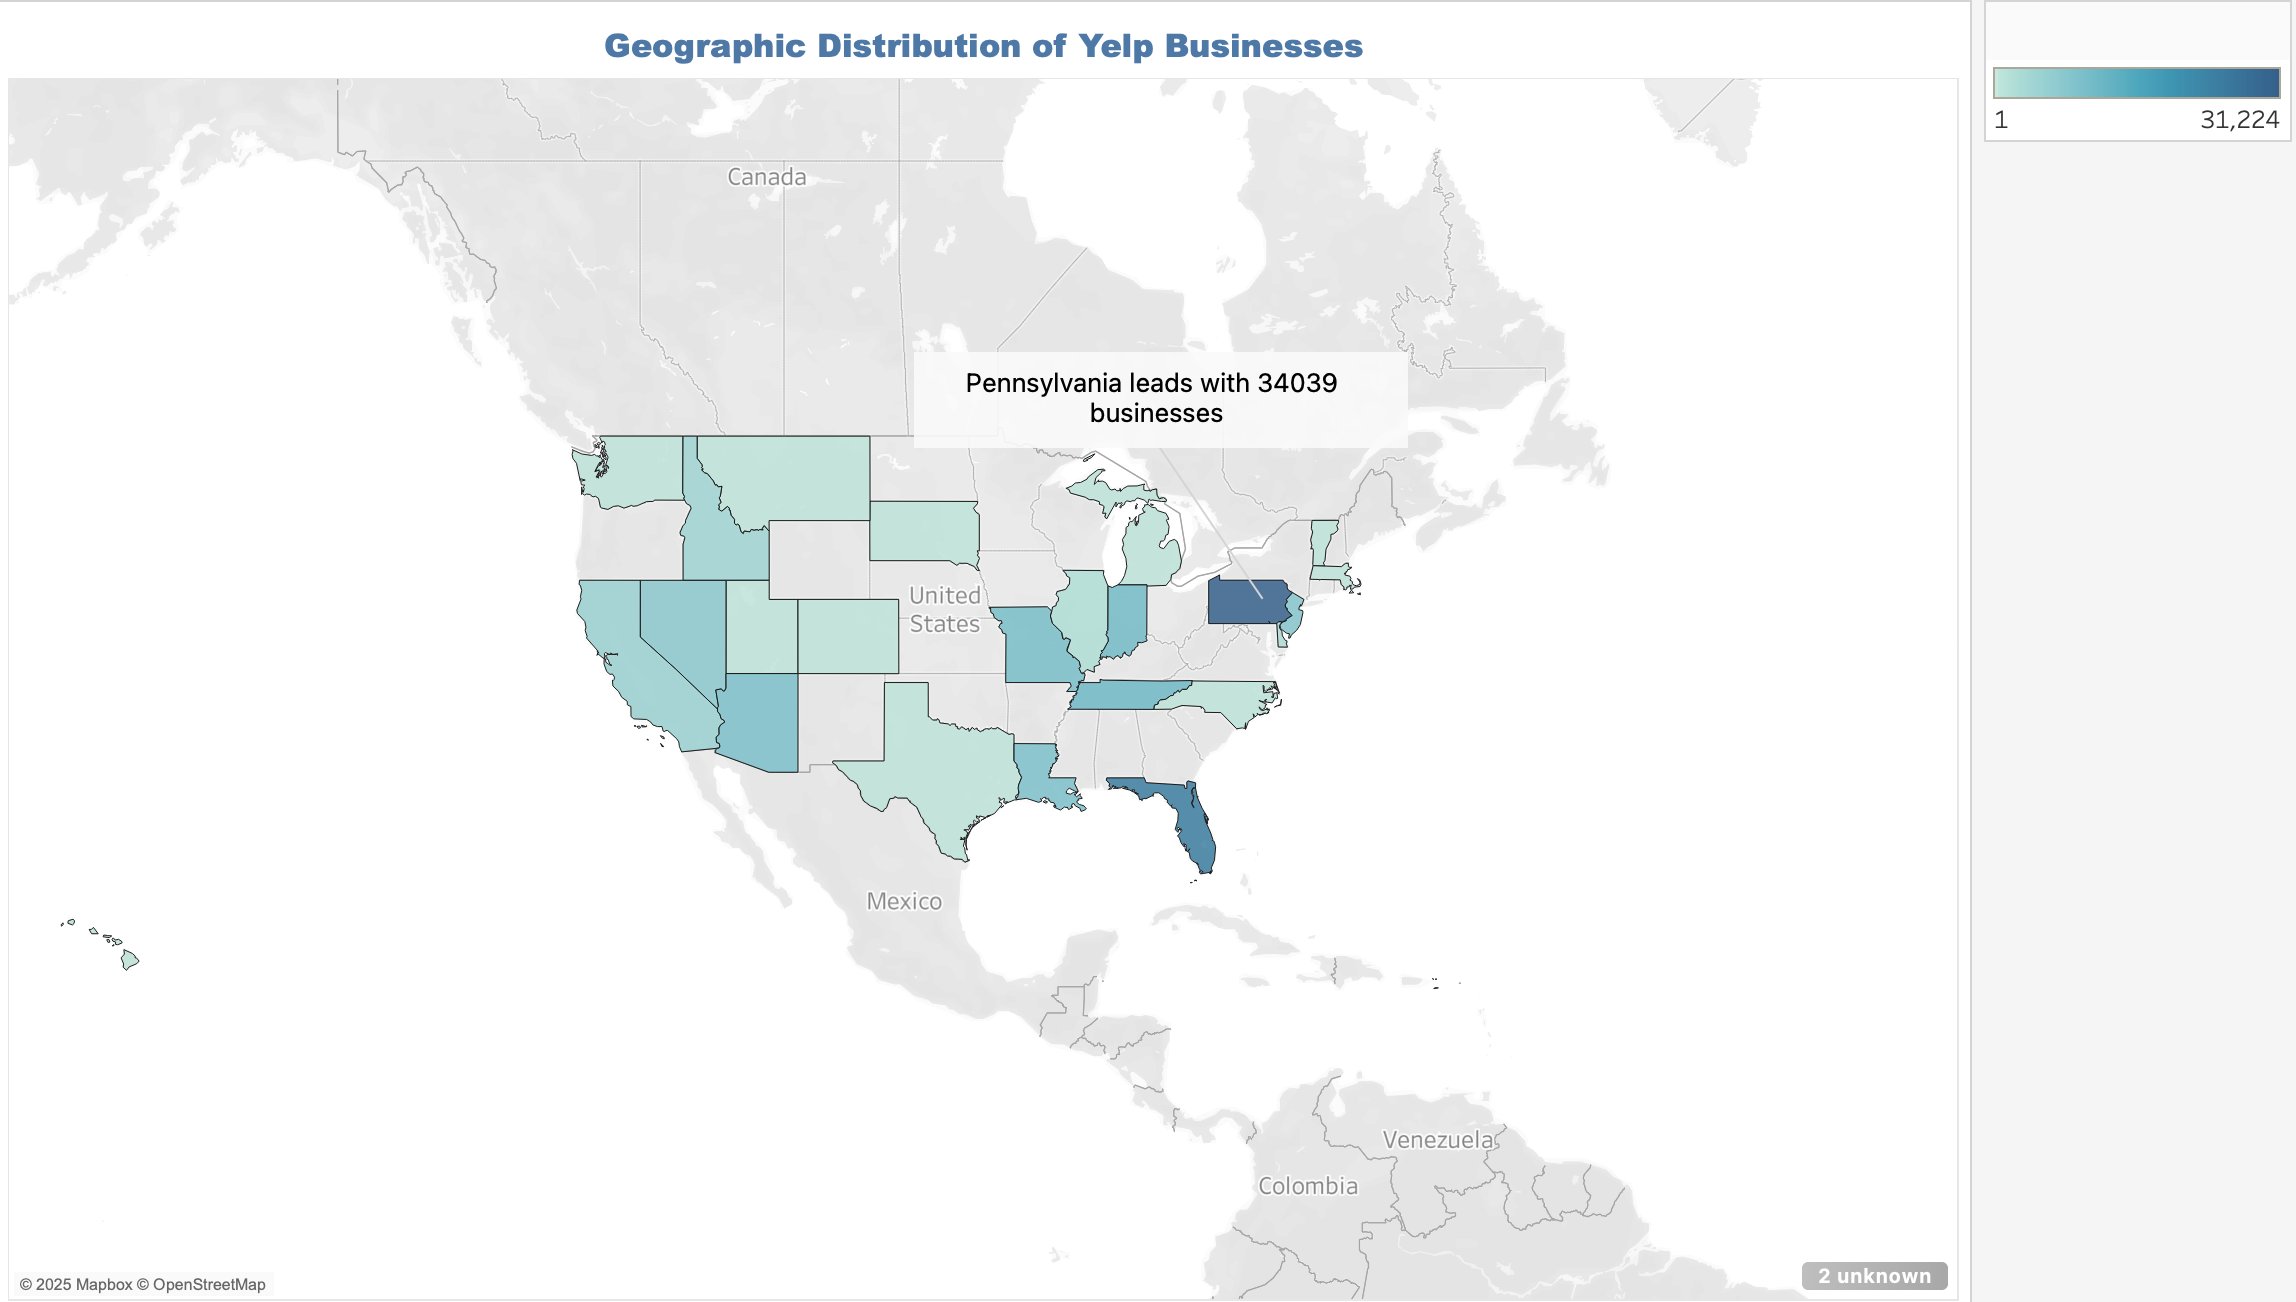

Purpose:

To identify where Yelp activity is most concentrated across the U.S. and highlight high-density states like Pennsylvania, helping businesses understand regional market opportunities.



---



#### Most-Rated Yelp Business Categories (Bar Chart)

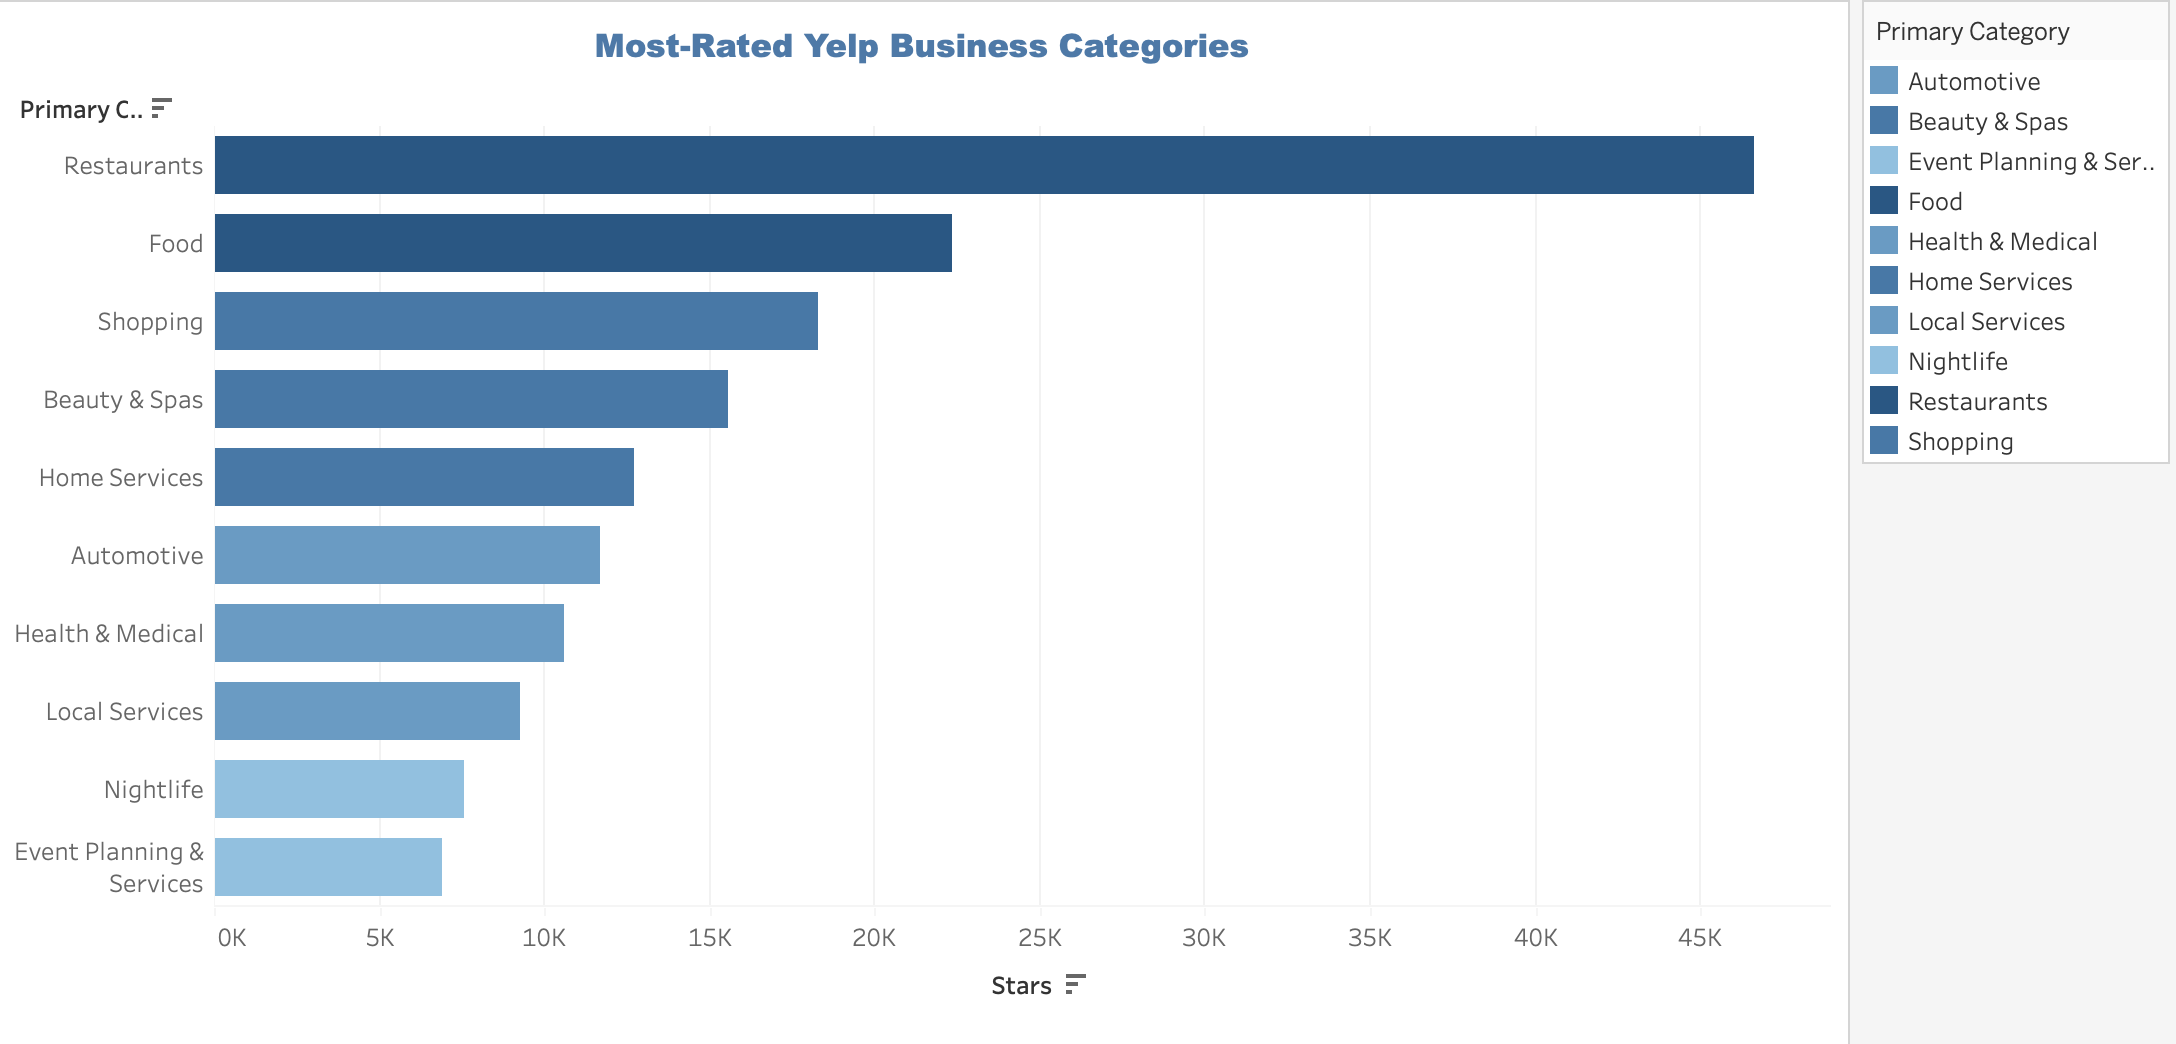

Purpose:

To reveal which business categories receive the most customer attention, indicating where user engagement is highest and competition is strongest.



---



#### Top 20 Categories: Volume & Rating (Bar Chart)

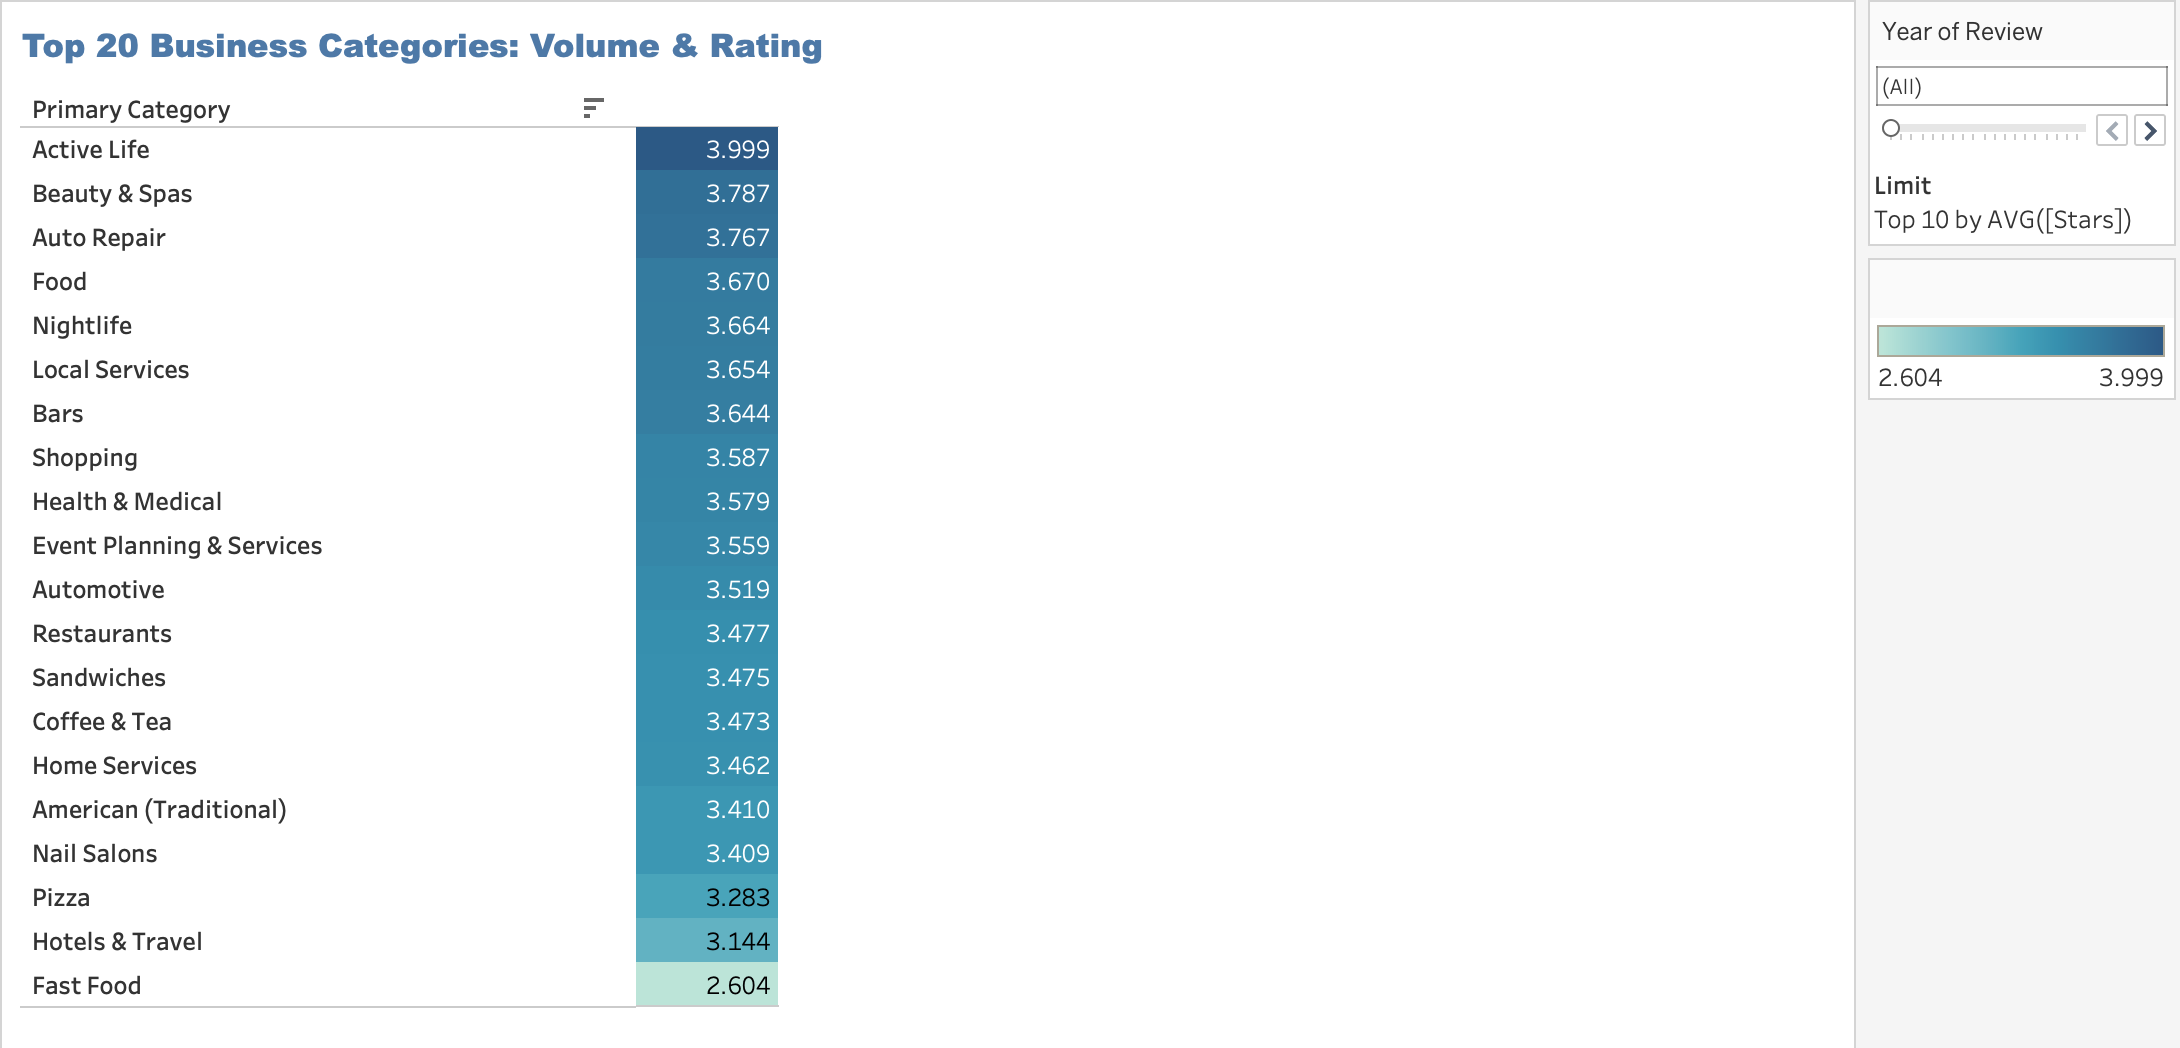

Purpose:

To compare categories by both popularity and quality, helping identify high-performing segments and categories with improvement potential.



---



#### Consistency of Business Categories (Bubble Chart)

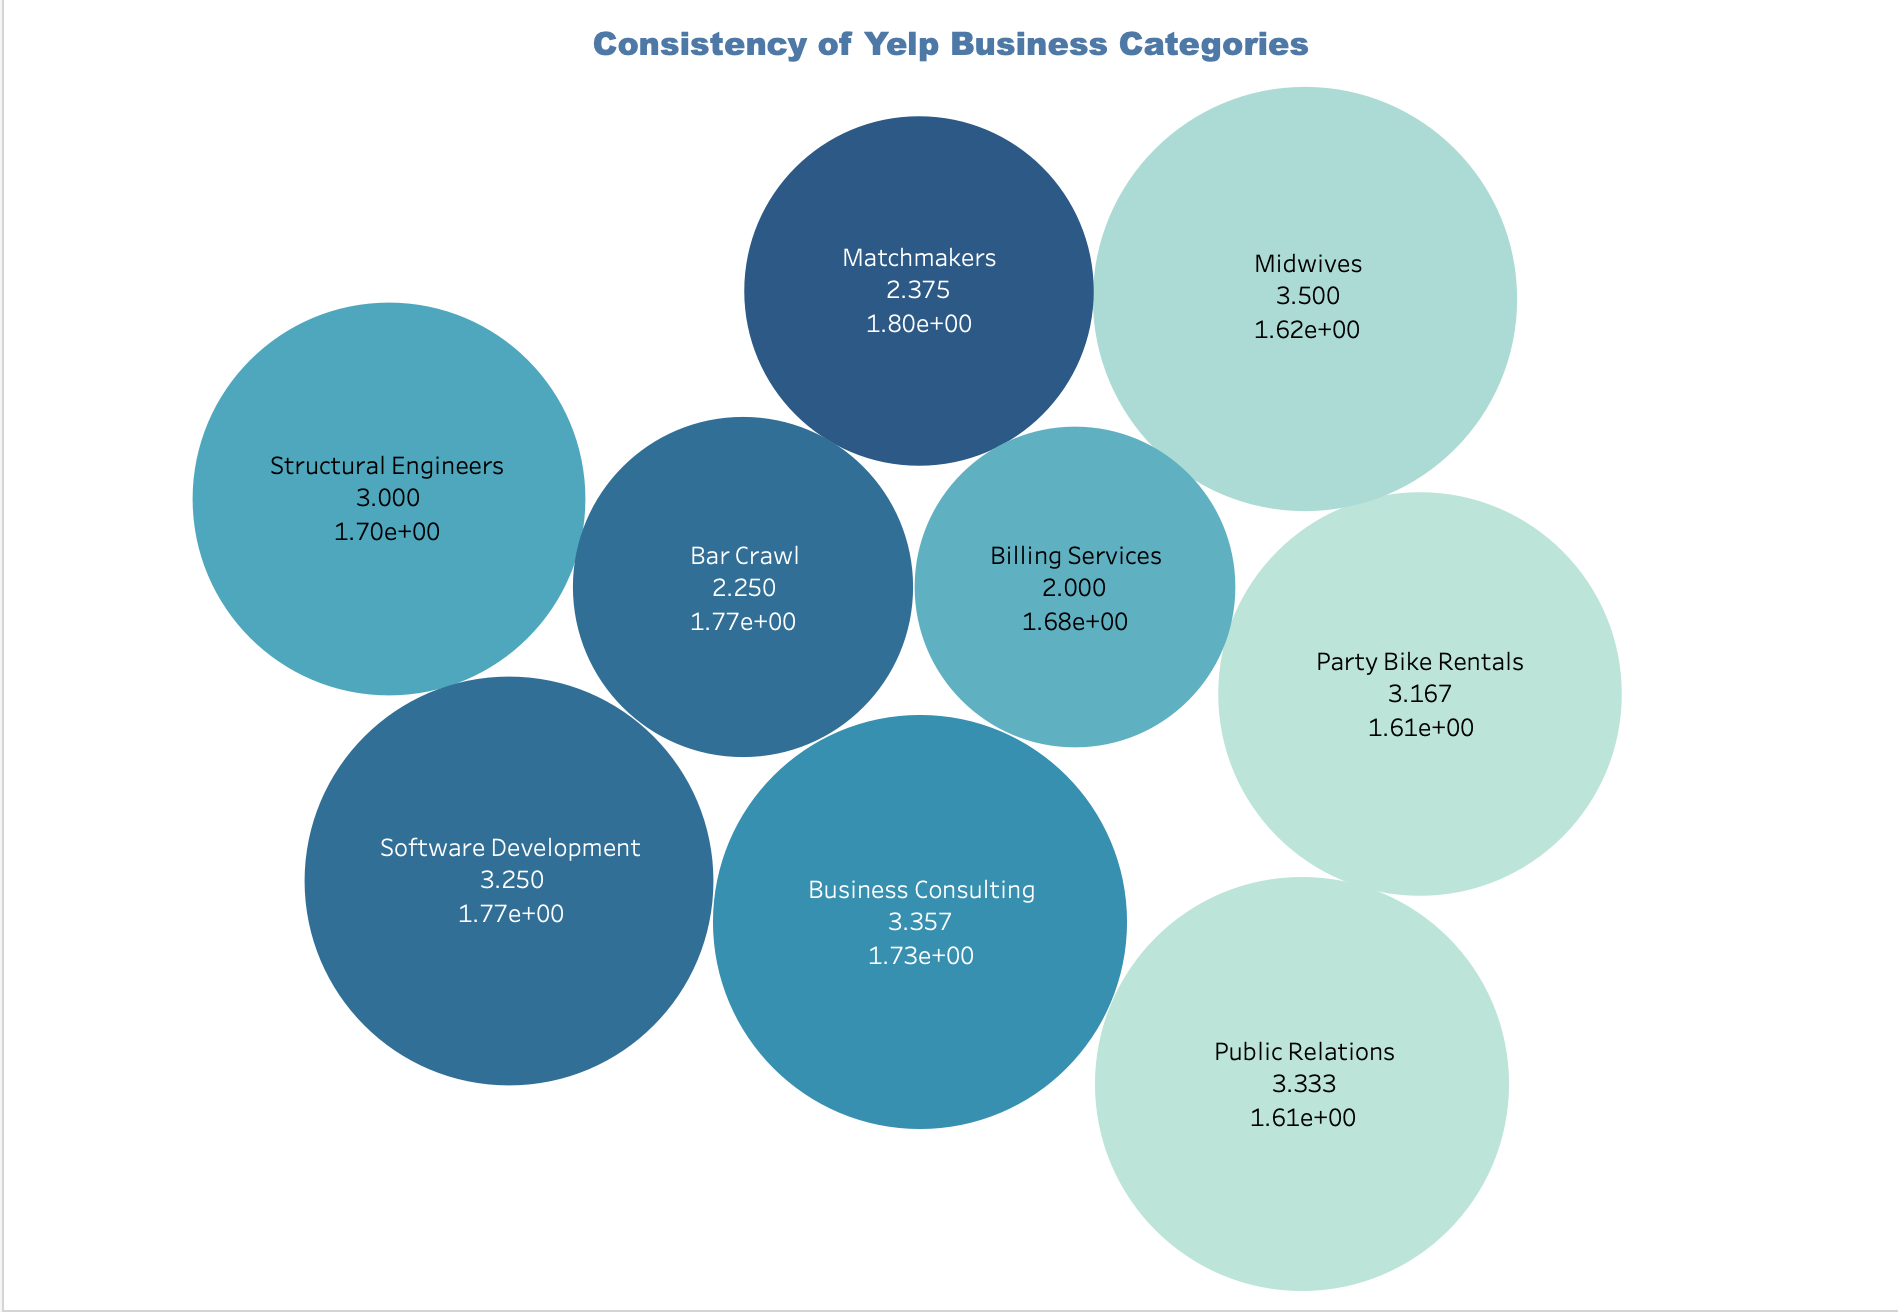

Purpose:

To evaluate rating stability across business categories and highlight which segments deliver consistent customer experiences versus those with fluctuating performance.



---



#### Monthly Review Activity (Line Chart)

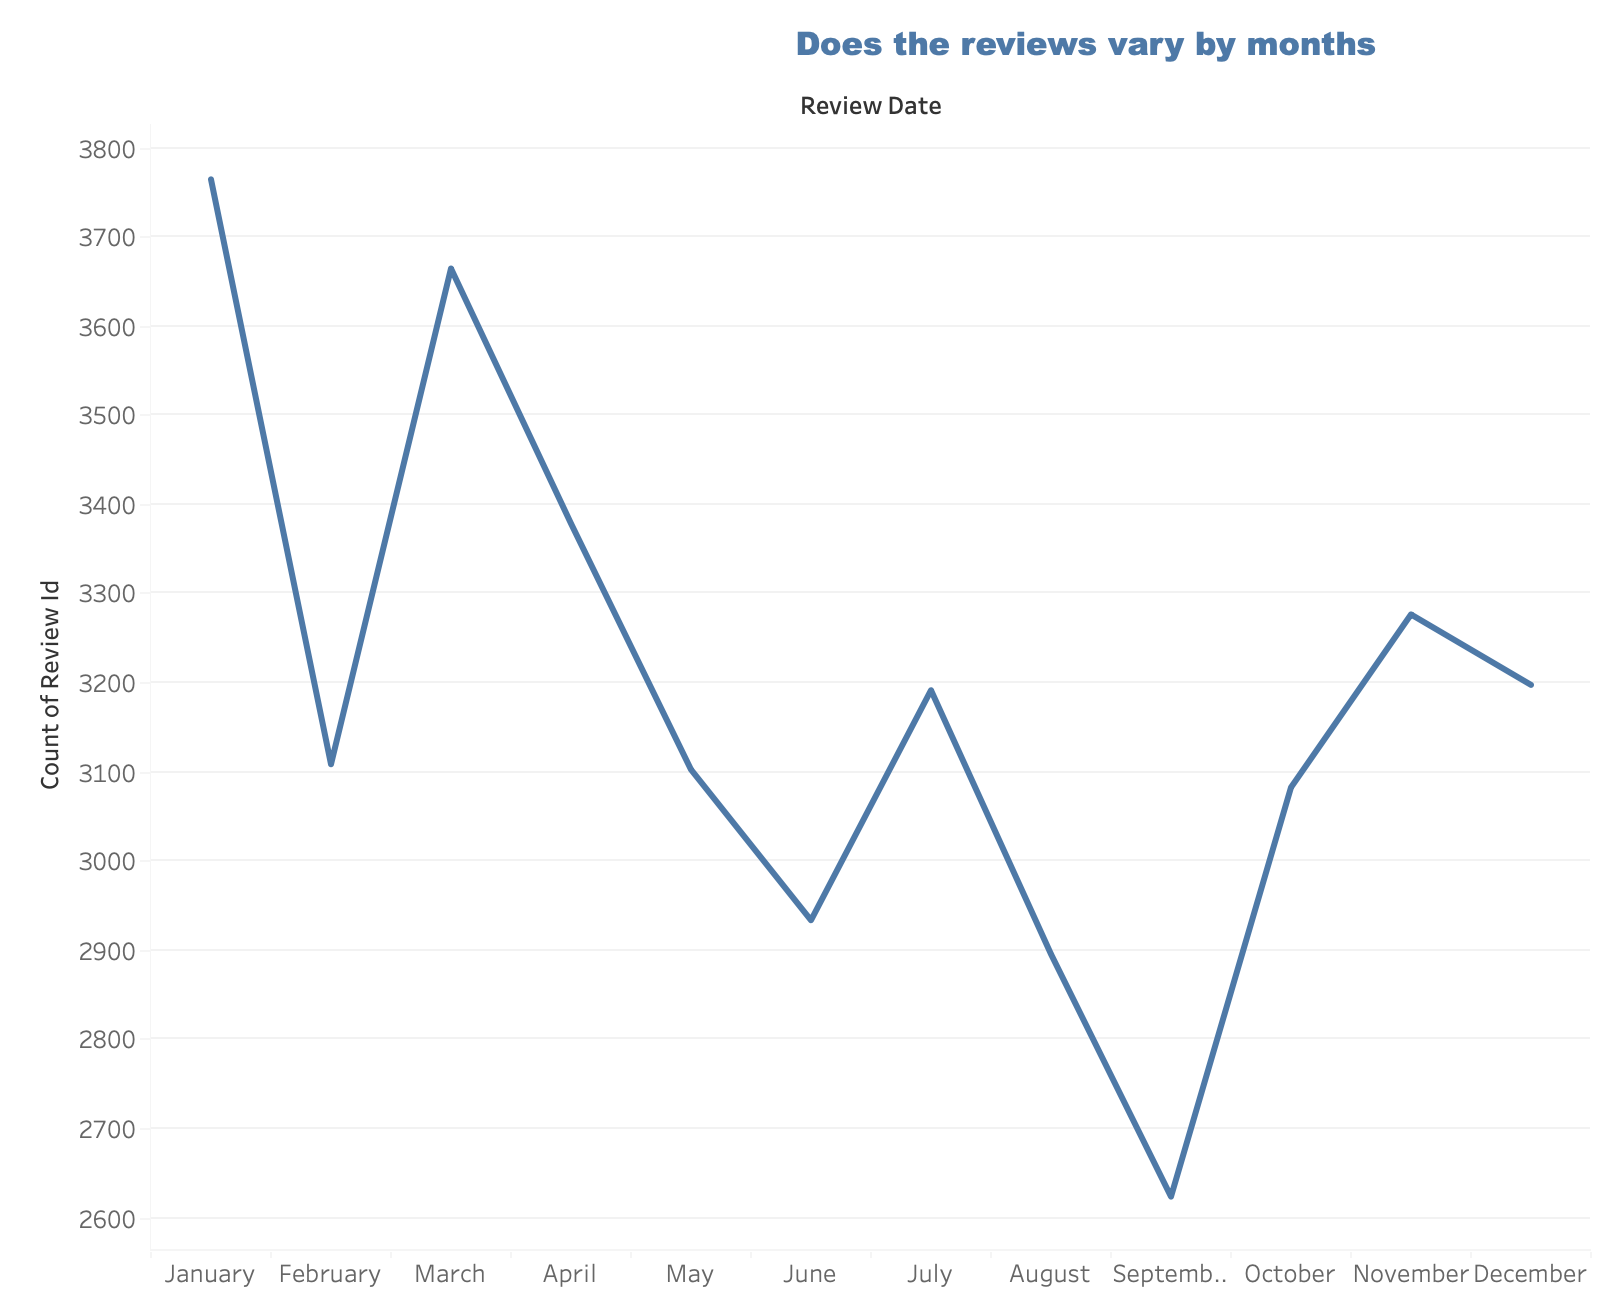

Purpose:

To uncover seasonal patterns in customer reviewing behavior, allowing businesses to anticipate demand fluctuations throughout the year.



---



#### Platform Growth: Review Volume & Quality Over Time (Dual-Axis Line Chart)

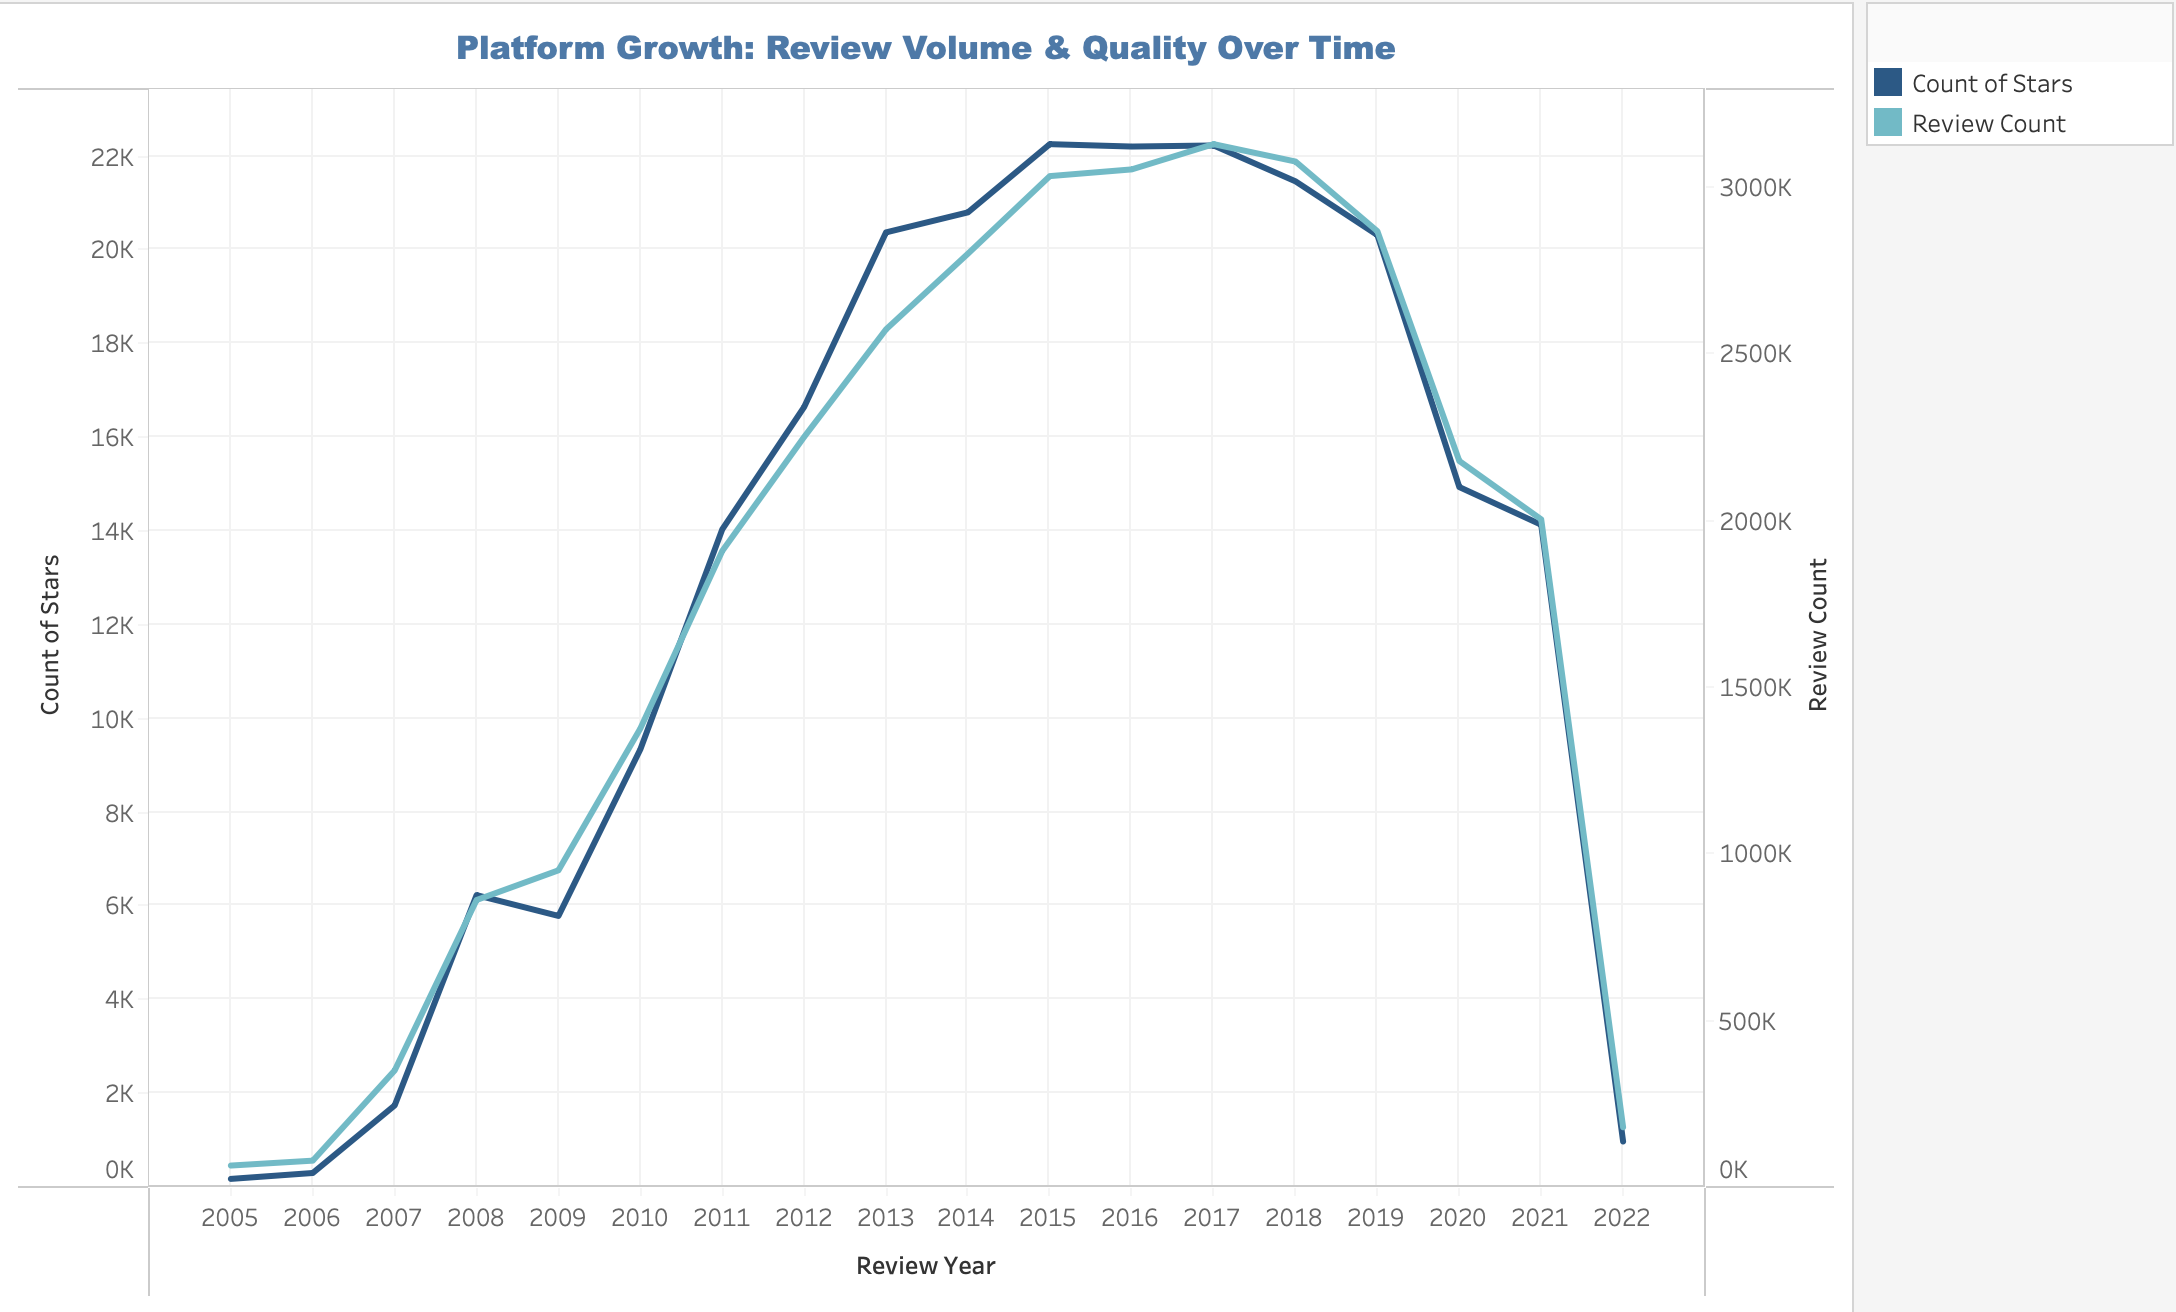

Purpose:

To show how Yelp’s review volume and average ratings evolve over time, revealing long-term shifts in engagement and customer sentiment.



---



#### Annual Activity by Review Type (Line Chart)

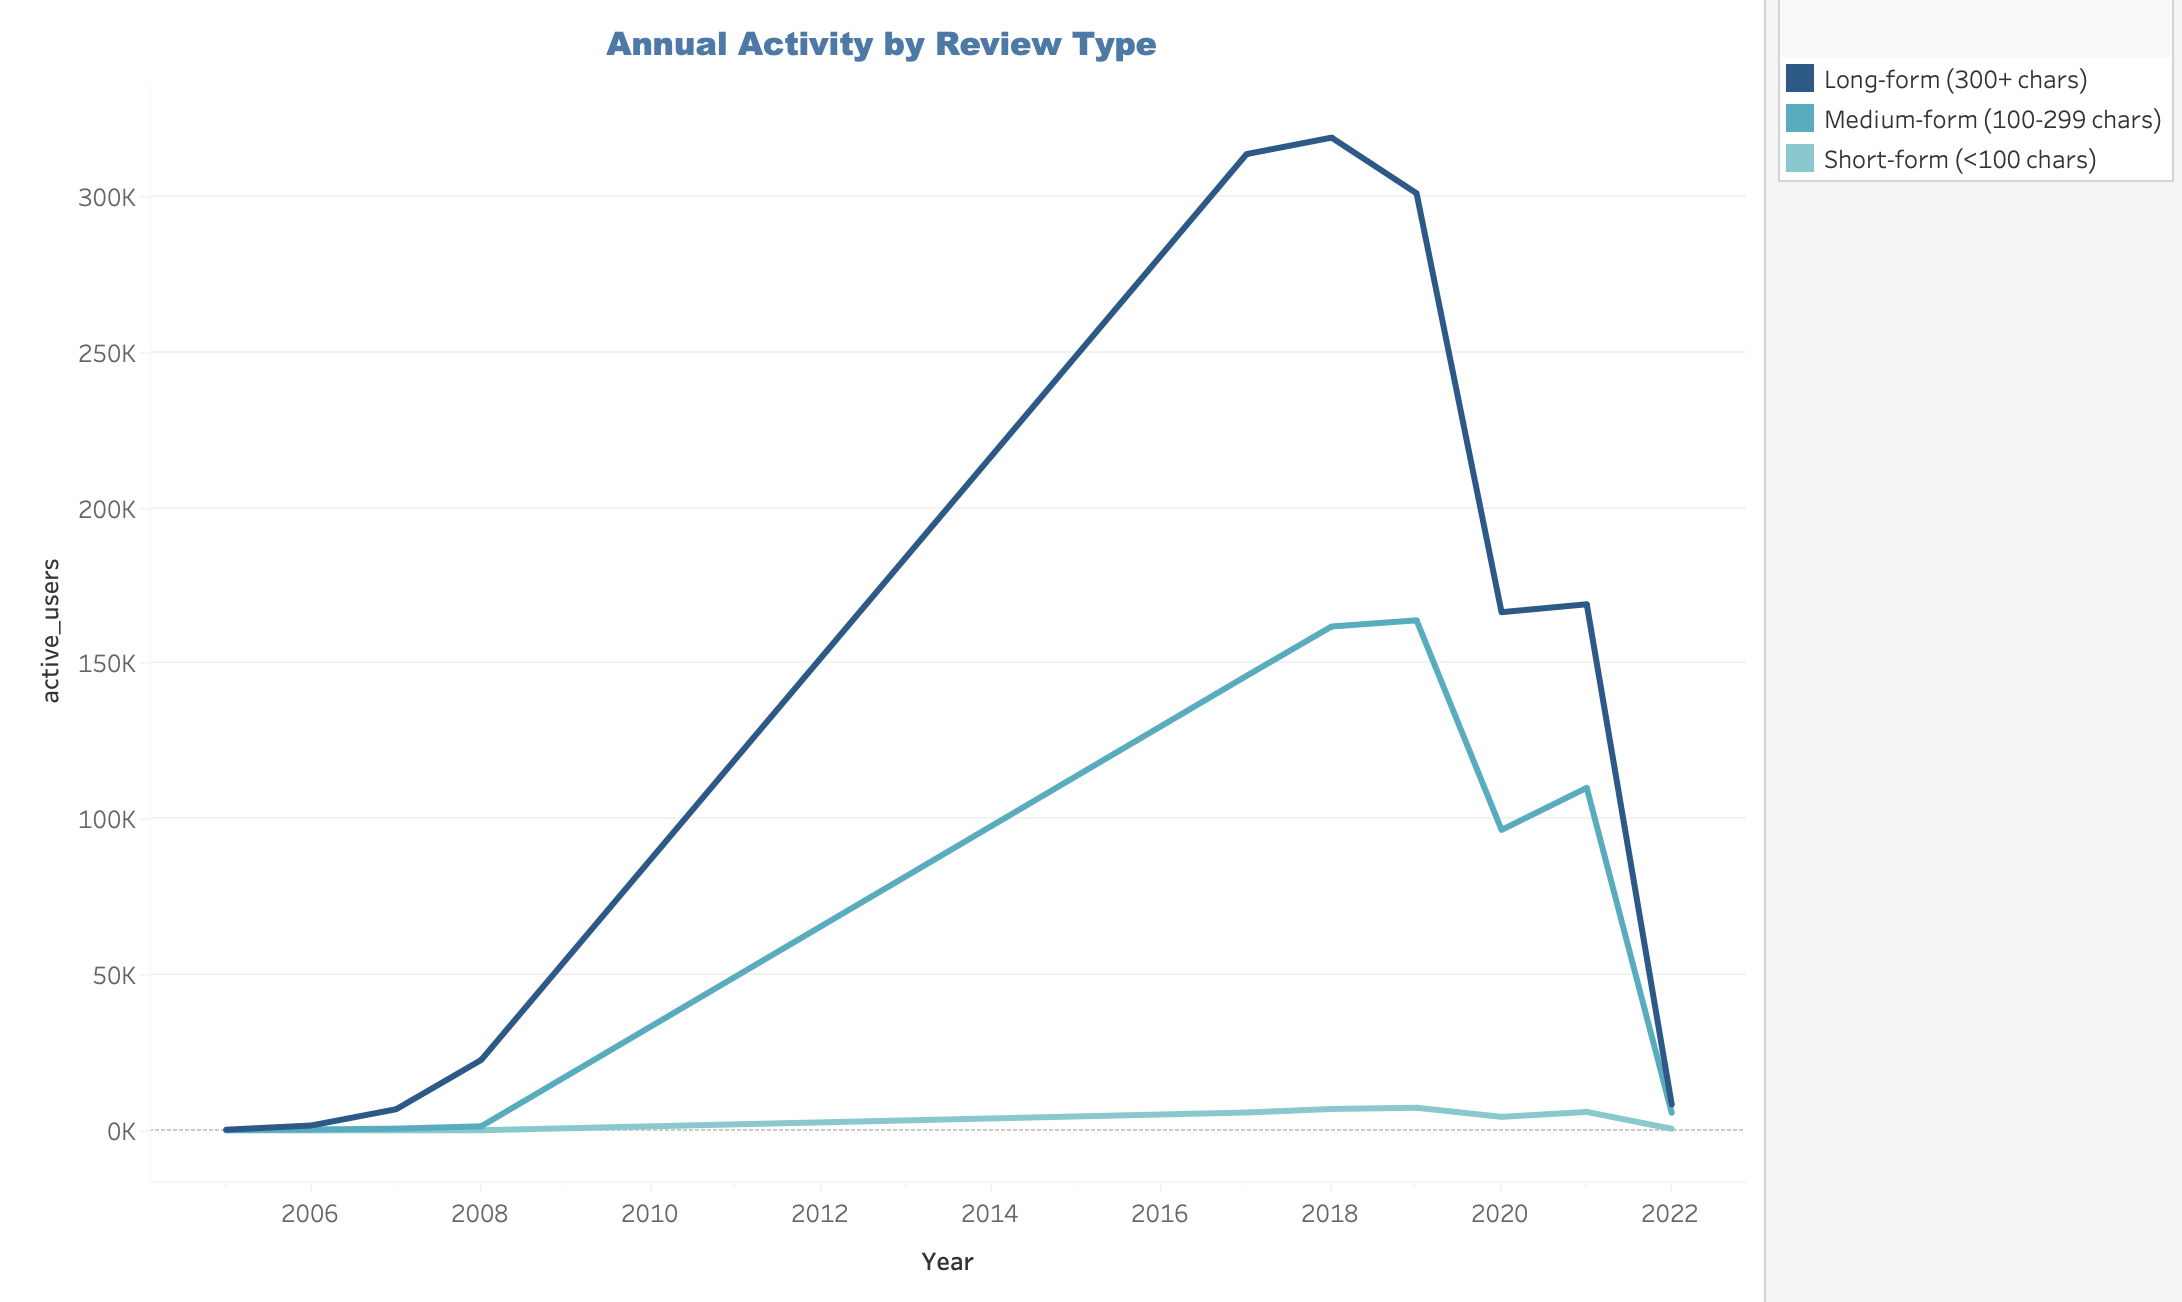

Purpose:

To compare how engagement with long-form, medium-form, and short-form reviews has changed over time. This helps reveal shifts in user behavior and shows which types of reviews drive the most yearly activity on Yelp.



---



#### Reaction Mix by User Segment (Stacked Bar)

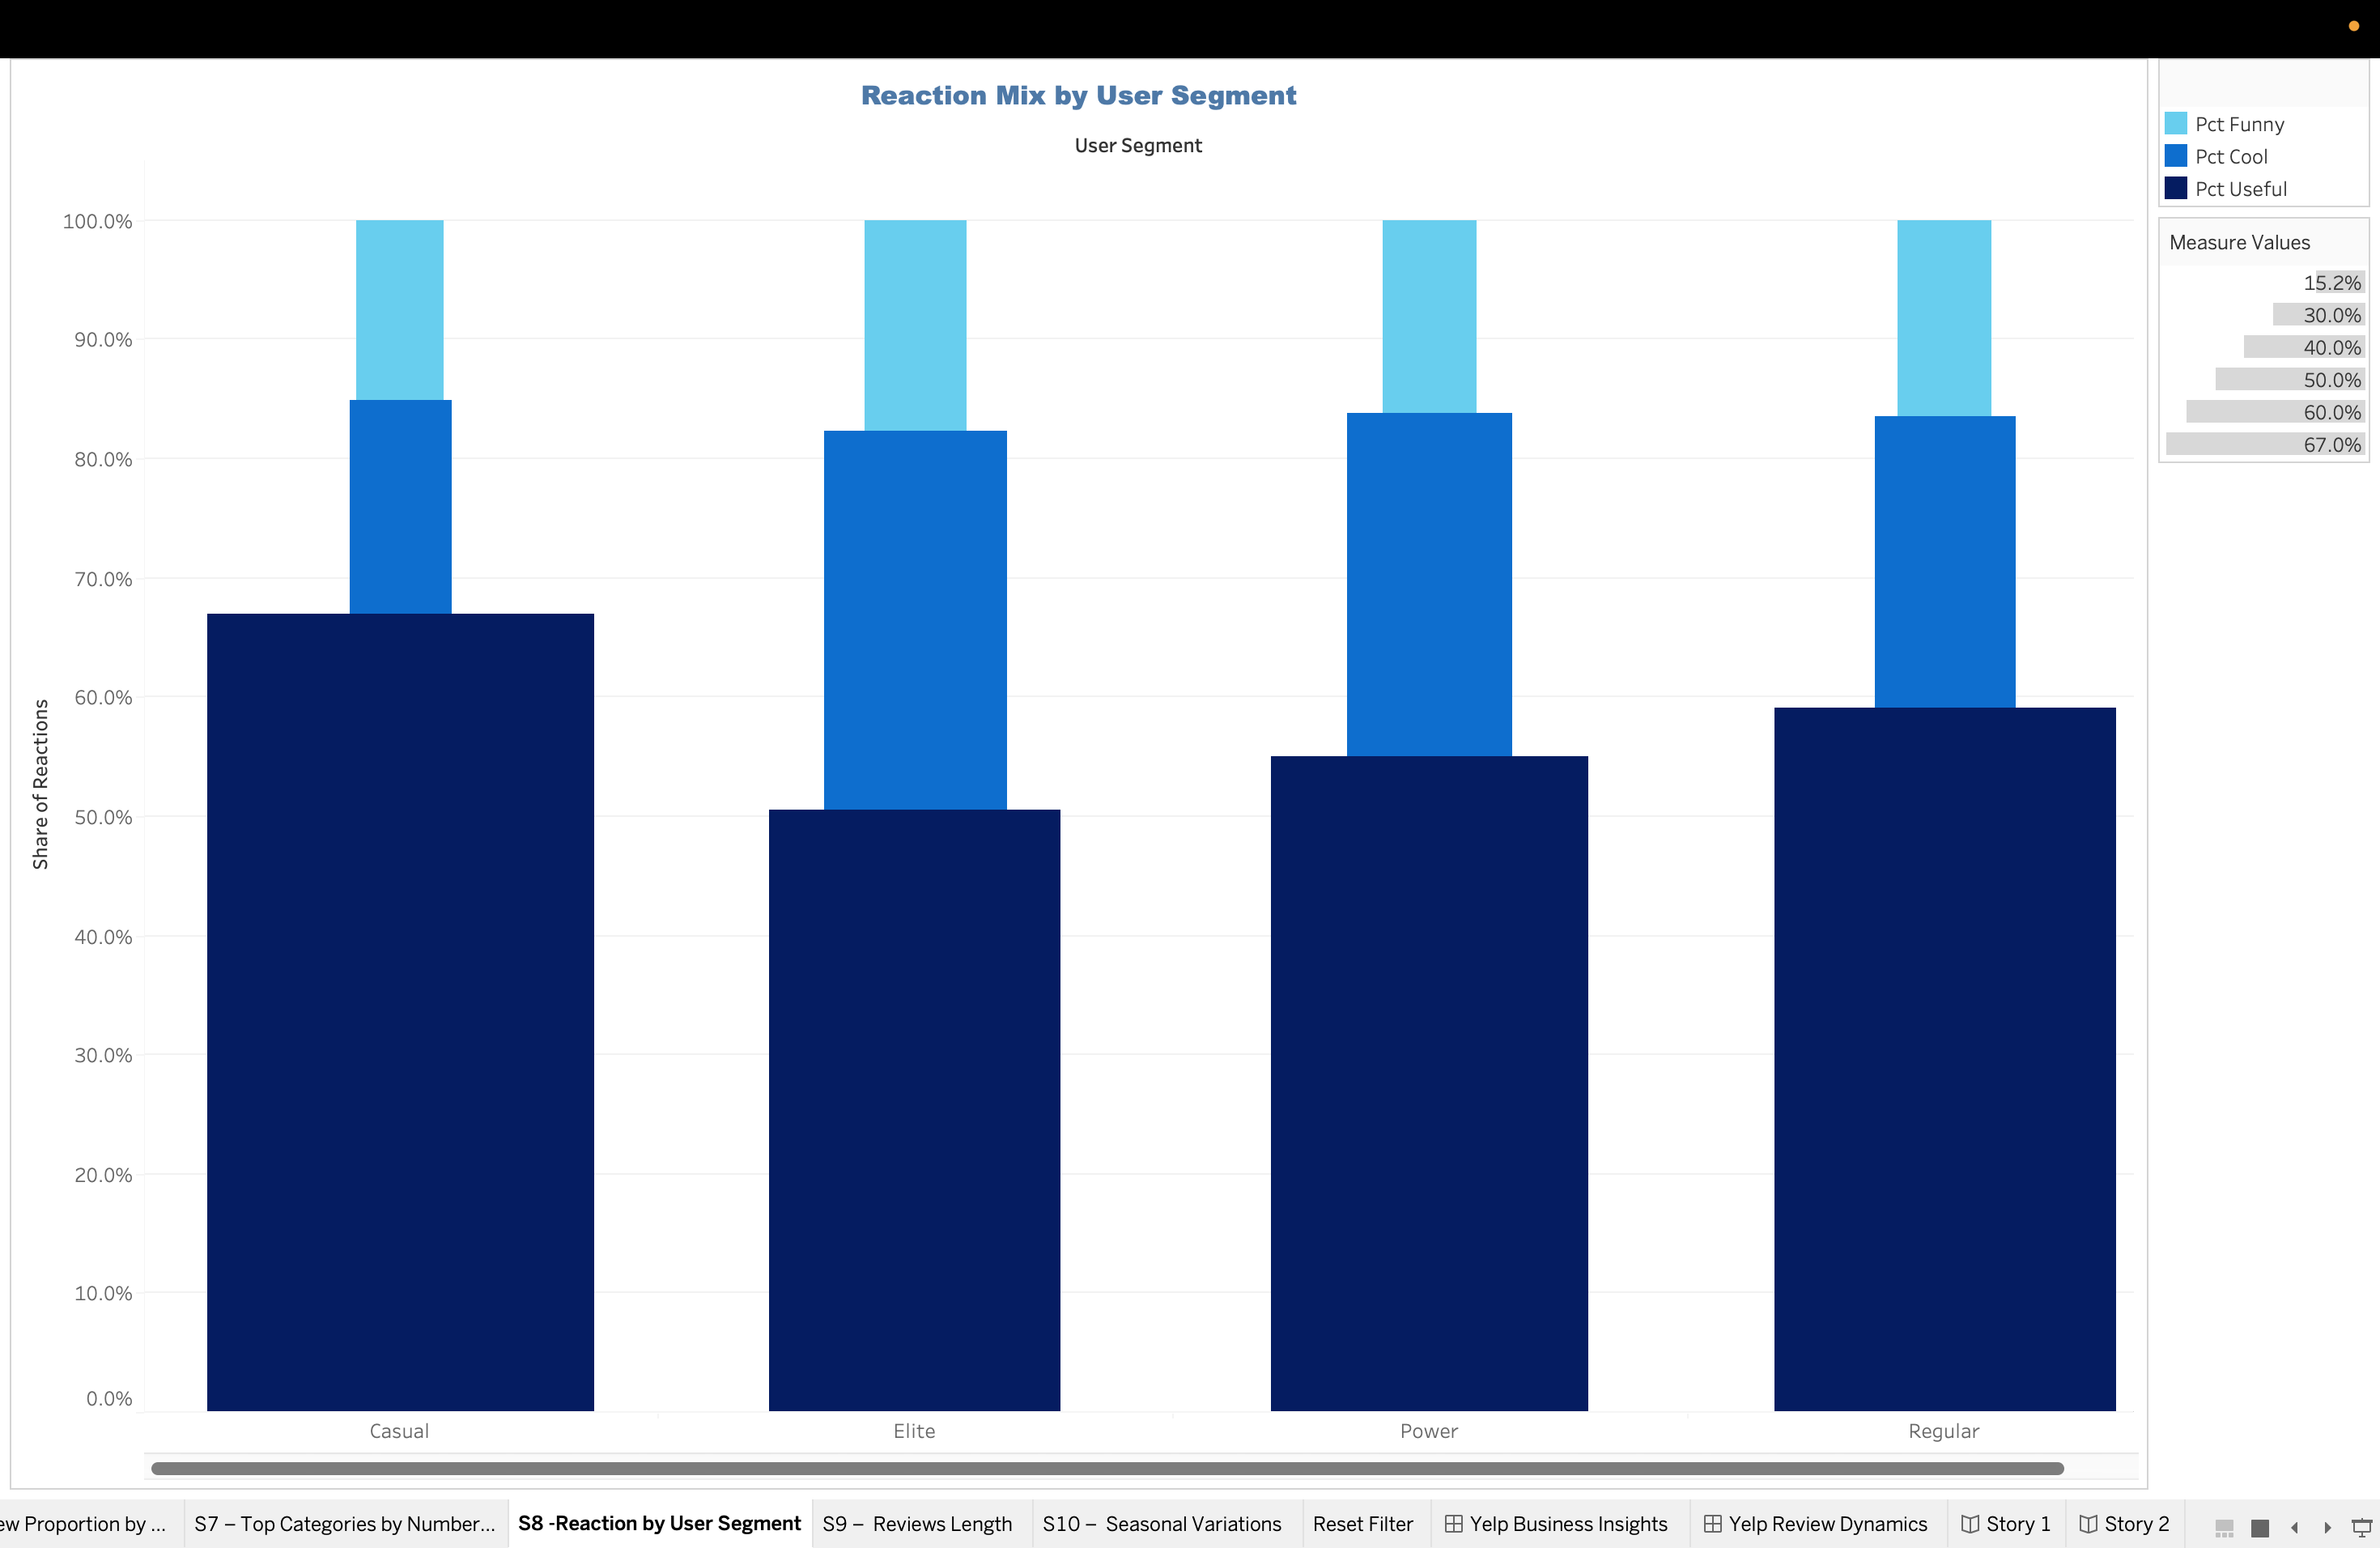

Purpose:

To show how elite users distribute their reactions (Useful, Funny, Cool) and highlight the types of engagement they contribute most. This helps identify which reactions matter most when influential users interact with reviews.



---



#### Problem Categories: Highest Negative Review Rates (Bar Chart)

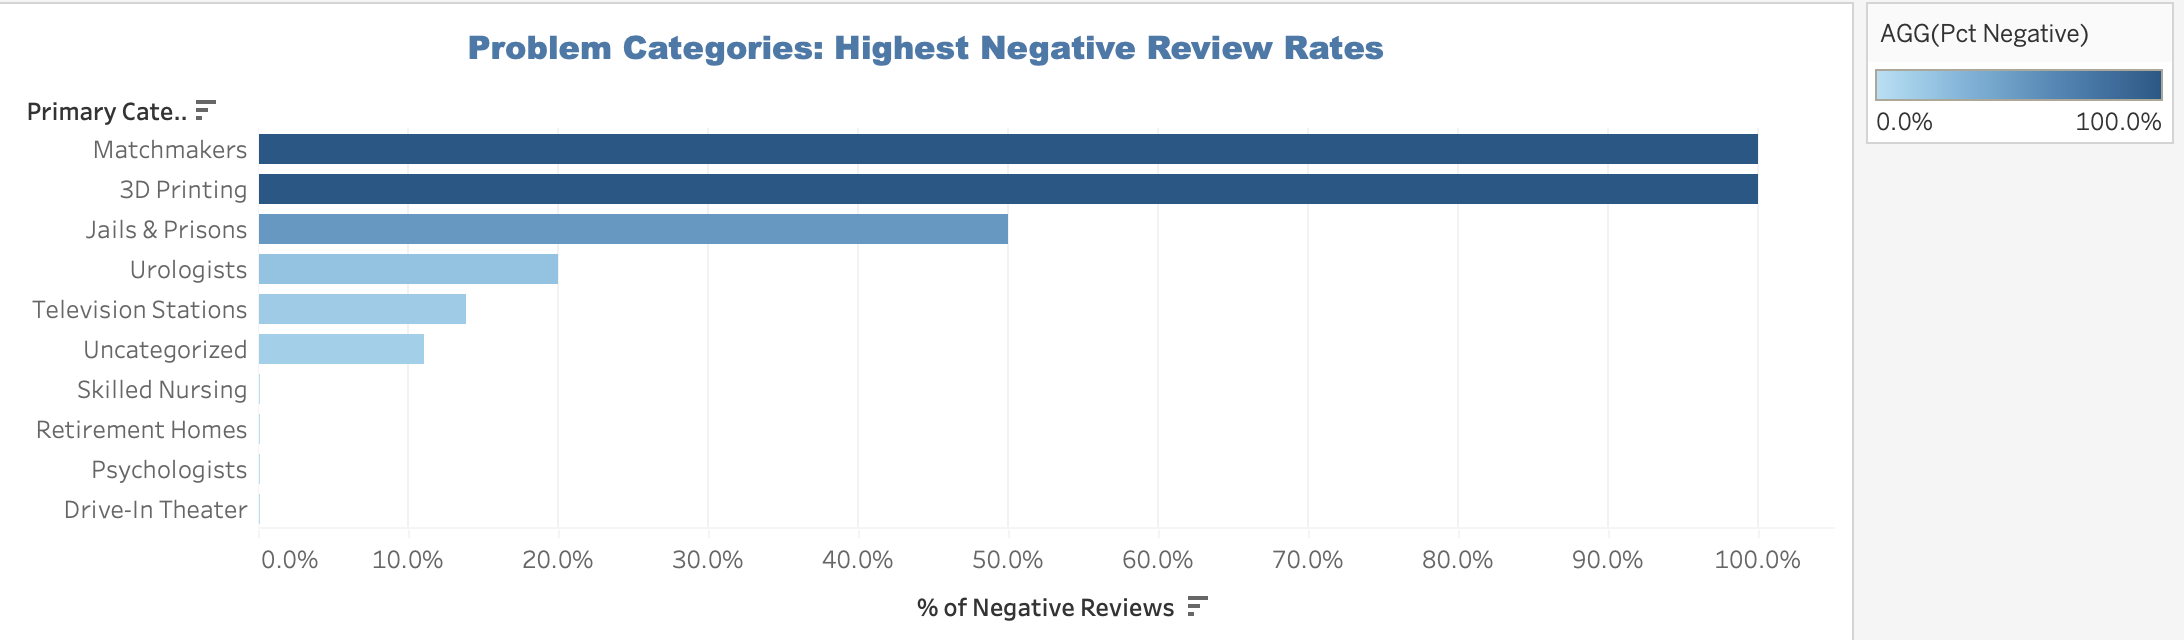

Purpose:

To pinpoint business categories with the highest share of negative reviews. This helps identify high-risk segments where customer dissatisfaction is concentrated and where businesses need the most improvement.



---



#### Most Engaged User Segments on Yelp (Treemap)

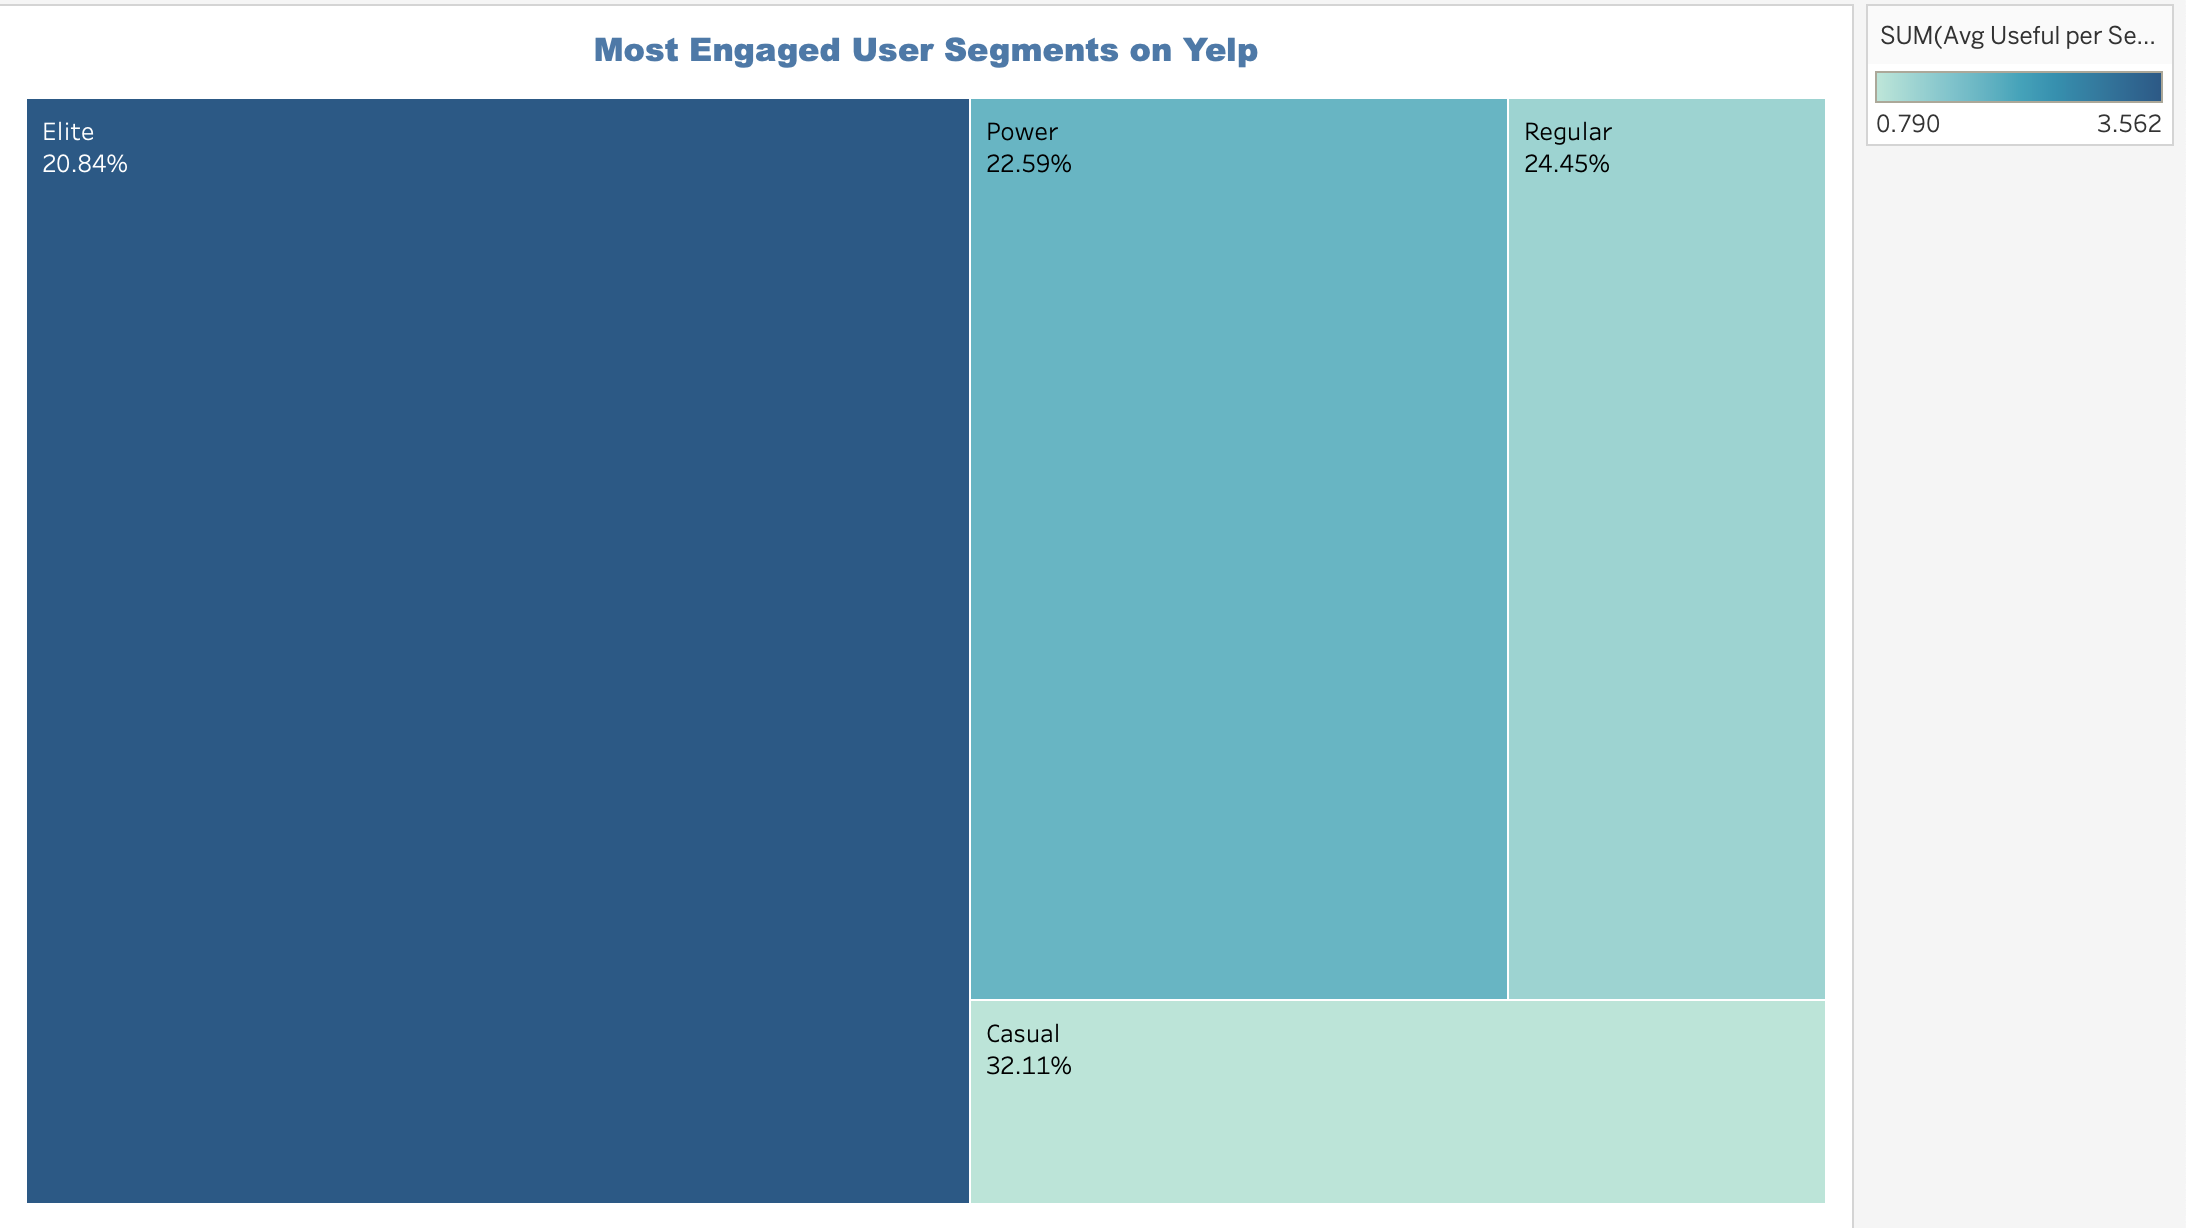

Purpose:

To visualize how different user segments (Elite, Power, Regular, Casual) contribute to overall engagement. The chart clearly shows which segments interact the most and helps businesses understand who drives activity on Yelp.

#### Dashboard

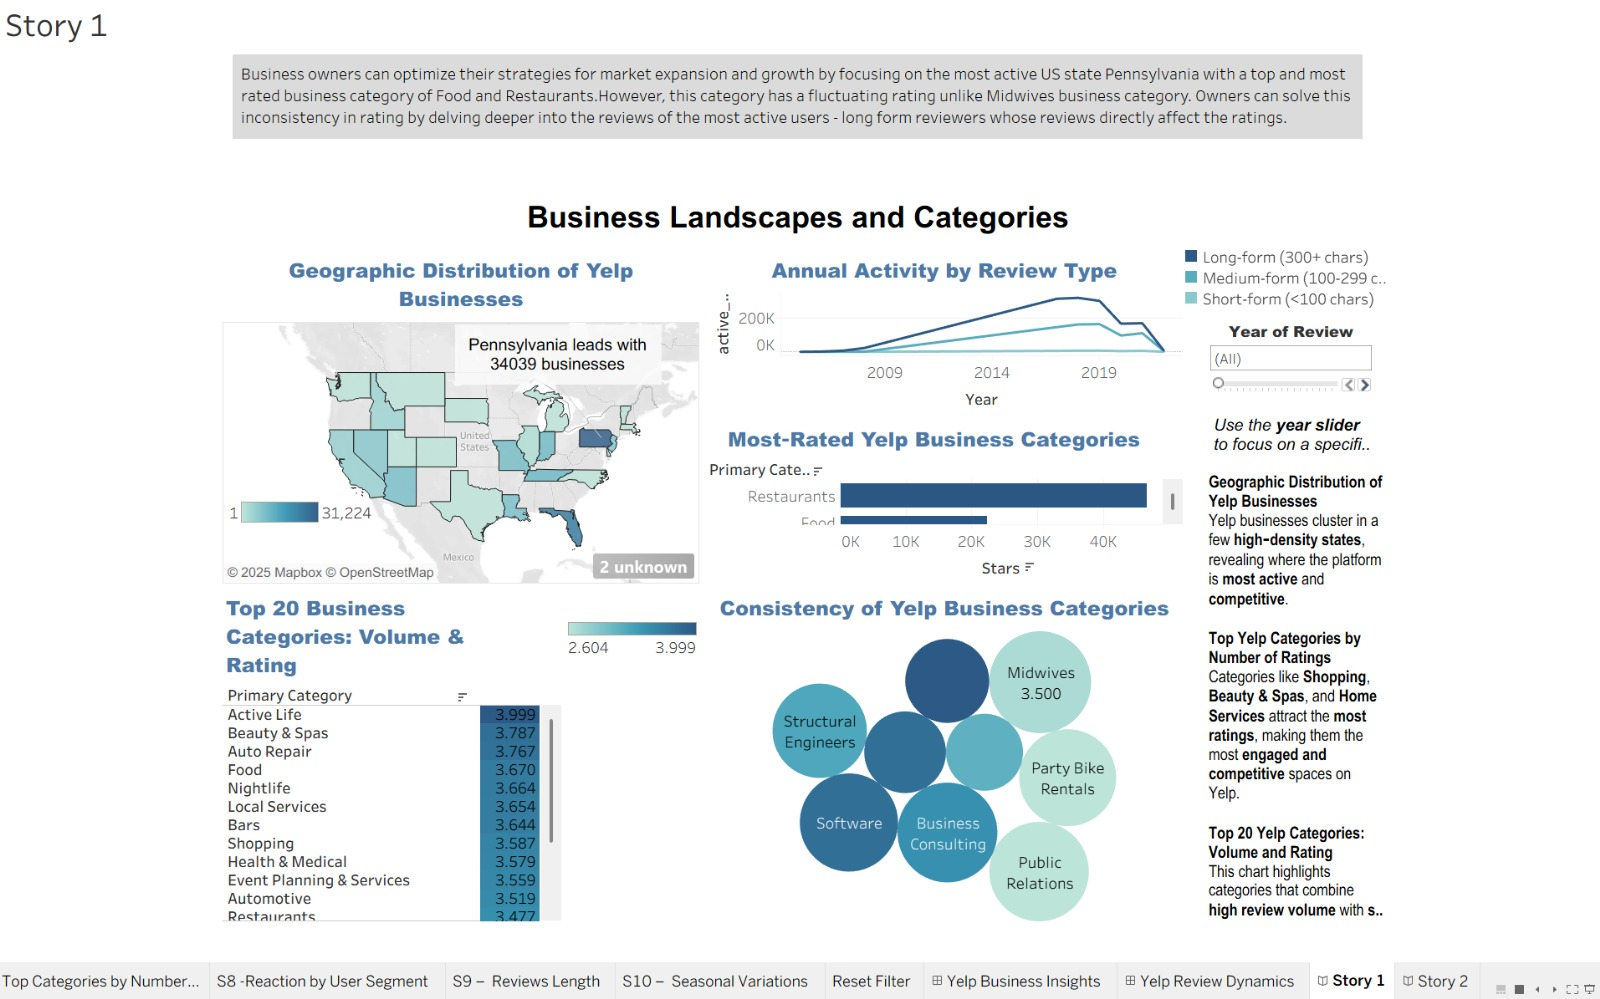

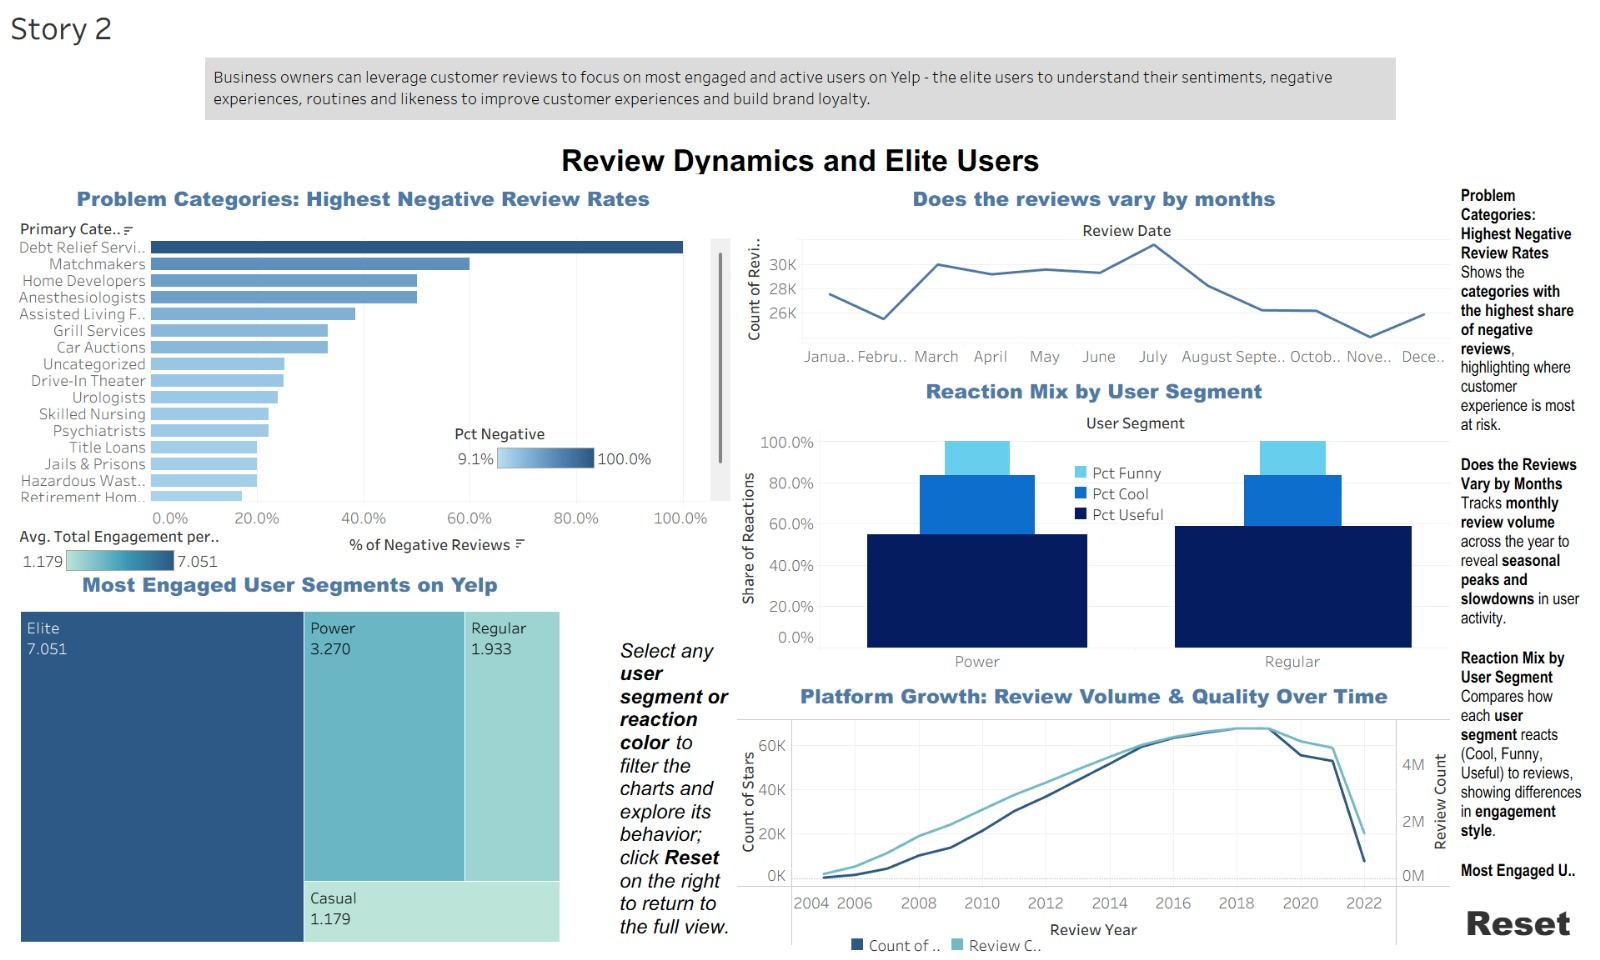

## Conclusion

1.   **Business Distribution & Category Activity (High Impact / Low Effort)**

*   Yelp activity is heavily concentrated in certain states (e.g., Pennsylvania), creating highly competitive markets

*   Action: Businesses in dense regions should emphasize differentiation and highlight unique value to stand out

*   Risk: High concentration may reflect user density rather than actual business quality

*   Next: Compare business success rates across low- and high-density regions

2.   **Category Performance & Rating Stability (High Impact / Medium Effort)**

*   High-volume categories (Food, Beauty & Spas, Shopping) attract the most reviews but show inconsistent ratings

*   Action: Businesses in volatile categories should prioritize service consistency and monitor sentiment closely

*   Risk: Category differences may stem from diverse customer expectations rather than operational failures.

*   Next: Conduct category-specific deep dives to identify drivers of rating swings

3. **Review Behavior Over Time (Medium Impact / Medium Effort)**

*   Long-form reviews dominated for years but have declined significantly after 2020

*   Action: Encourage customers to leave detailed reviews by offering prompts or incentives at checkout

*   Risk: Declines may reflect external trends (COVID, mobile usage), not platform-specific issues

*   Next: Track whether prompting increases review length without reducing review frequency

4. **User Engagement & Elite User Influence (High Impact / Medium Effort)**

*   Elite users generate the highest reaction rates, especially “Useful” votes, shaping overall sentiment

*   Action: Build loyalty programs or early-access benefits to cultivate more “Elite-like” engagement

*   Risk: Engagement may be skewed toward niche, highly active users who don’t represent the full customer base

*   Next: Compare business outcomes between those frequently reviewed by elite vs. casual users

5. **Seasonal & Monthly Review Patterns (Medium Impact / Low Effort)**

*   Monthly review volume fluctuates, revealing seasonal cycles in user activity

*   Action: Align staffing, promotions, and marketing with expected review peaks

*   Risk: Seasonality may vary by category; general trends may not apply universally

*   Next: Build category-specific seasonal review forecasts

6. **Negative Review Exposure by Category (High Impact / High Effort)**

*   Categories like Matchmakers, 3D Printing, and Jails & Prisons experience extremely high negative review rates (50–90%)

*   Action: For these industries, prioritize transparency, expectation-setting, and service recovery processes

*   Risk: Some categories inherently attract negative sentiment due to the nature of the service

*   Next: Identify rare high-performing businesses within these categories to study best practices.

7. **Platform Growth & Long-Term Trends (Medium Impact / Low Effort)**

*   Yelp review volume grew steadily until 2018, then sharply declined, showing shifts in user behavior and platform engagement

*   Action: Track changes in customer feedback channels (Google Maps, TikTok reviews, Instagram) to adapt strategy

*   Risk: External market forces—not business quality—may explain the decline

*   Next: Compare Yelp engagement trends with alternative review ecosystems

### Next Steps / Implications

*   Run experiments to test whether prompting users for longer or more detailed reviews increases engagement without reducing review volume

*   Conduct cross-platform comparison of Yelp review trends versus Google Maps, TripAdvisor, and TikTok to evaluate shifting user behavior

*   Integrate customer surveys to understand why certain categories experience higher negative review rates and identify expectation gaps

*   Build a monitoring dashboard for businesses to track seasonal review cycles, elite user engagement, and category-level risk in real time

*   Analyze rare high-performing businesses in historically low-rated categories to uncover best practices that can be replicated

*   Investigate geographic differences more deeply to understand why certain cities or regions generate disproportionately high Yelp activity


### Limitations

*   Observational Data: All findings are correlational, not causal. We identify patterns but cannot definitively prove one variable causes another. Controlled experiments are necessary to establish causation.

*   Temporal Changes: Yelp culture has evolved over 20 years. Patterns from 2005 may not apply to 2025.

*   Survivorship Bias: Dataset only includes businesses that survived long enough to accumulate reviews. Failed businesses with incomplete profiles or poor ratings are underrepresented, potentially underestimating the importance of profile completion.



---



## References



1.   [Yelp Open Dataset](https://business.yelp.com/data/resources/open-dataset/)
2.   [Yelp Dataset SQL Lookup PDF - Scribd](https://www.scribd.com/document/447233314/yelp-dataset-sql-lookup-pdf)
3.   [SQL Data Analysis - GeeksforGeeks](https://www.geeksforgeeks.org/sql/sql-data-analysis/)
4.   [Yelp SQL Interview Questions - DataLemur](https://datalemur.com/blog/yelp-sql-interview-questions)
5.   [Business Analysis on Yelp Dataset - Kaggle ](https://www.kaggle.com/code/anhoangvo/business-analysis-on-yelp-dataset)
6. [Yelp Dataset - Github](https://github.com/hemachandarn/Yelp-Dataset)
7. [Github Reference](https://github.com/soltaniehha/Business-Analytics-Toolbox/blob/master/docs/team-projects/2024-Fall/A04-Analyzing-Yelp-Customer-Review-Trends.ipynb)





---



## Generative AI disclosure


Generative AI (ChatGPT) was used strictly as an aid for interpreting error messages, debugging code, and understanding SQL logic during the Yelp dataset analytics project. ChatGPT assisted team members in:

  * **Error Explanation & Debugging:** Clarifying ambiguous SQL errors and suggesting possible causes, referencing relevant documentation or best practices.​

  * **Understanding SQL Syntax & Structure:** Answering questions about code structure, joins, aggregation, and BigQuery-specific functions to help the team troubleshoot bottlenecks and resolve bugs.

  * **Improving Troubleshooting Efficiency:** Providing workflow suggestions for identifying issues, isolating root causes, and verifying SQL logic, which allowed team members to debug faster and with greater confidence.​


**Boundaries of Use:**

  * ChatGPT was NOT used to write, modify, or implement SQL code directly. All queries were drafted, tested, and finalized by our project team, and code changes were done exclusively by team members.

  * No conclusions, insights, or business decisions were drawn from AI-generated output; all analysis reflects team-driven interpretation of verified dataset results.

  * Grammar checking for markdown explanations.